## import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
!pip install sidetable
import sidetable

# to display all columns and rows:
pd.set_option('display.max_columns', None)

In [2]:
# Reading the dataset
df=pd.read_csv("deepq_ai_assignment_data.csv")

In [3]:
# The first 5 observation of the data set were accessed.
df.head()

,UID,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,Target_ChurnFlag,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X188,X189,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215
0,1003904-3746,14 month lease,1103.0,2015-01-08,2016-02-28,2015-07-30,2015-01-08,2015-01-08,2015-07-30,2015-07-01,NaN,False,NaN,1103.0,0,0,1,NaN,13,1-3 years,1,16,6,1,0,0,0,0,1,1,2016,2015-01-08,2015-07-30,0,0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2206.0,-1.0,-1.0,1,1,1,0,1,0,1,0,0,1,25,NaN,NaN,46.120308,25.0,25,25,0,1,42000.0,NaN,9,4,8,0,0,1,1,1,2,714.0,714.0,1.0,1.0,-1,-1,-1.000000,-1,-1,-1,-1,-1.000000,-1,-1,-1,-1,15,0,9,11.133333,5,14,1,7,0.555556,5,0,9,0,40004,240,ACTIVE,Riverside,CA,92507-8463,40004,Other SoCal,B,Garden,suburban,University City/Moreno Valley,0,312,16,71,399,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007,2015-Q1,2015-01-01,1249.0,1249.0,0.883106,0.883106,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.466667,0.037037,0.333333,0.0,0.600000,0.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,1.0,1.544818,1.000000,1.6625,0.600000
1,1003904-3751,12 month lease,1136.0,2015-01-24,2016-01-17,NaN,2003-09-11,2003-09-11,NaN,NaN,NaN,False,NaN,1136.0,0,0,1,2016-01-18,12,6-12 months,13,15,7,0,0,0,0,0,1,0,2016,2015-01-24,2016-01-17,0,0,1103.0,0.029918,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1,1,1,1,0,0,1,1.000000,0.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2272.0,-1.0,-1.0,1,1,1,0,1,0,0,1,0,1,46,NaN,NaN,-1.000000,46.0,46,46,0,0,0.0,NaN,9,4,8,0,0,1,1,1,2,714.0,714.0,1.0,1.0,0,7,8.285714,4,12,0,16,0.176471,7,0,17,1,14,0,2,8.214286,4,13,0,16,0.176471,7,0,17,1,40004,240,ACTIVE,Riverside,CA,92507-8463,40004,Other SoCal,B,Garden,suburban,University City/Moreno Valley,0,312,16,71,399,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007,2015-Q1,2015-01-01,1249.0,1249.0,0.909528,0.909528,0.083333,0.083333,0.083333,0.083333,0.000000,0.0,0.083333,0.083333,0.000000,0.083333,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.083333,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.142857,0.012605,0.500000,0.0,1.214286,0.071429,1.230769,0.013575,0.538462,0.0,1.307692,0.076923,1.0,1.591036,1.000000,1.6625,0.142857
2,1003904-3756,12 month lease,1382.0,2015-02-20,2016-02-21,2016-02-21,2015-02-20,2015-02-20,NaN,NaN,NaN,False,NaN,1382.0,0,0,1,2016-02-22,12,6-12 months,1,14,7,1,0,0,0,0,1,0,2016,2015-02-20,2016-02-21,0,0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2764.0,-1.0,-1.0,3,3,2,1,2,1,1,1,0,2,41,Full Time Homemaker,Retired,0.000000,44.0,41,47,1,2,66360.0,Full Time Homemaker,18,5,16,2,0,1,1,1,1,1060.0,1060.0,2.0,2.0,-1,-1,-1.000000,-1,-1,-1,-1,-1.000000,-1,-1,-1,-1,13,0,10,11.384615,6,17,1,20,0.714286,15,0,21,1,40004,240,A

In [4]:
df.shape

(167020, 217)

- It consists of 167020 records and 217 features.

In [5]:
#features 
df.columns.values

array(['UID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27',
       'Target_ChurnFlag', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34',
       'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43',
       'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52',
       'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70',
       'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79',
       'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88',
       'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97',
       'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105',
       'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113',
       'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X121',
       'X122', '

In [6]:
# Feature information
df.info(verbose=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167020 entries, 0 to 167019
Data columns (total 217 columns):
 #    Column            Dtype  
---   ------            -----  
 0    UID               object 
 1    X0                object 
 2    X1                float64
 3    X2                object 
 4    X3                object 
 5    X4                object 
 6    X5                object 
 7    X6                object 
 8    X7                object 
 9    X8                object 
 10   X9                object 
 11   X10               bool   
 12   X11               float64
 13   X12               float64
 14   X13               int64  
 15   X14               int64  
 16   X15               int64  
 17   X16               object 
 18   X17               int64  
 19   X18               object 
 20   X19               int64  
 21   X20               int64  
 22   X21               int64  
 23   X22               int64  
 24   X23               int64  
 25   X24               

In [7]:
import sys
np.set_printoptions(threshold=217)
df.describe()   # Descriptive statistics of the data set accessed.

,X1,X11,X12,X13,X14,X15,X17,X19,X20,X21,X22,X23,X24,X25,X26,X27,Target_ChurnFlag,X29,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X101,X102,X103,X104,X105,X106,X107,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X153,X159,X160,X161,X162,X163,X166,X167,X168,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X188,X189,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215
count,167020.000000,0.0,167020.000000,167020.0,167020.0,167020.0,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.0,167020.0,167020.0,167020.000000,167020.000000,167020.0,167020.0,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.0,167020.0,167020.000000,167020.0,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.0,167020.000000,167020.000000,167020.0,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,129509.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,1.670200e+05,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.0,167020.000000,167020.000000,167020.0,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000
mean,1878.648610,NaN,1872.815329,0.0,0.0,1.0,12.392115,2.411262,11.287157,4.622363,0.483529,0.038989,0.000180,0.0,0.0,1.0,0.400665,2018.299198,0.0,0.0,938.306116,-0.457714,-0.265211,-0.924213,0.145750,0.603061,0.727704,0.504816,-0.427140,-0.998071,-0.999916,-1.0,-1.0,-0.973636,-1.0,0.813645,2.746925,0.227422,0.171574,2.903125,1.719466,-2.030446,-0.885503,0.482313,5.782966,5.905778,1.122189,5.905778,1.633397,0.348671,1.954832,2.086131,1.365402,6.253700,0.000120,0.0,0.000581,0.000048,0.0,1.512645,1.230895,0.902688,0.761999,0.644737,0.127344,0.109053,0.870812,0.032230,0.362448,-0.213340,-0.005125,3179.036785,955.7

- The attributes X1, X12, X34,'X78','X107' ,X66,X65,X86,X101, X126,X125,X139,'X137',X139,'X138',X142,X171,X212 has large difference in their 75% and maximum values that is there are some outliers in data

In [8]:
#Replacing -1 with NaN
df=df.replace(-1,np.nan)  

In [9]:
#changing datatype to DateTime
df.loc[:,['X2','X3','X4','X5','X6','X7','X8','X9','X16','X30','X31','X170','X29']] = df.loc[:,['X2','X3','X4','X5','X6','X7','X8','X9','X16','X29','X30','X31','X170']].apply(pd.to_datetime, errors='coerce')


#changing datatype to category
cols = ['X149', 'X155', 'X156', 'X157']
df[cols] = df[cols].astype('category')




In [10]:
df_object=df[(df.select_dtypes(include='object').columns)]
df_object

,UID,X0,X18,X99,X100,X108,X150,X151,X152,X154,X158,X164,X165,X169
0,1003904-3746,14 month lease,1-3 years,NaN,NaN,NaN,Riverside,CA,92507-8463,Other SoCal,University City/Moreno Valley,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,2015-Q1
1,1003904-3751,12 month lease,6-12 months,NaN,NaN,NaN,Riverside,CA,92507-8463,Other SoCal,University City/Moreno Valley,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,2015-Q1
2,1003904-3756,12 month lease,6-12 months,Full Time Homemaker,Retired,Full Time Homemaker,Riverside,CA,92507-8463,Other SoCal,University City/Moreno Valley,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,2015-Q1
3,1003904-3759,14 month lease,1-3 years,NaN,NaN,NaN,Riverside,CA,92507-8463,Other SoCal,University City/Moreno Valley,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,2015-Q1
4,1003904-3766,12 month lease,6-12 months,NaN,NaN,NaN,Riverside,CA,92507-8463,Other SoCal,University City/Moreno Valley,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,2015-Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167015,4555777-1709,12 month lease,6-12 months,NaN,NaN,NaN,Norwood,MA,02062-2433,Boston,West Norfolk County,"Boston-Cambridge-Newton, MA-NH",West Norfolk County,2020-Q2
167016,4555777-1817,13 month lease,1-3 years,NaN,NaN,NaN,Norwood,MA,02062-2433,Boston,West Norfolk County,"Boston-Cambridge-Newton, MA-NH",West Norfolk County,2020-Q3
167017,4555777-2026,12 month lease,6-12 months,NaN,NaN,NaN,Norwood,MA,02062-2433,Boston,West Norfolk County,"Boston-Cambridge-Newton, MA-NH",West Norfolk County,2020-Q3
167018,4555777-2291,11 month lease,6-12 months,NaN,NaN,NaN,Norwood,MA,02062-2433,Boston,West Norfolk County,"Boston-Cambridge-Newton, MA-NH",West Norfolk County,2020-Q4


In [11]:
df_object.shape

(167020, 14)

In [12]:
df_int=df[(df.select_dtypes(include='int64').columns)]
df_int

,X13,X14,X15,X17,X19,X20,X21,X22,X23,X24,X25,X26,X27,Target_ChurnFlag,X32,X33,X49,X57,X58,X59,X60,X61,X62,X63,X64,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X105,X106,X109,X110,X111,X112,X113,X114,X115,X116,X117,X147,X148,X153
0,0,0,1,13,1,16,6,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,1,0,1,9,4,8,0,0,1,1,1,2,40004,240,40004
1,0,0,1,12,13,15,7,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,1,0,0,9,4,8,0,0,1,1,1,2,40004,240,40004
2,0,0,1,12,1,14,7,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,2,1,2,1,1,1,0,2,1,2,18,5,16,2,0,1,1,1,1,40004,240,40004
3,0,0,1,14,1,13,8,1,0,0,0,0,1,1,0,0,0,0,5,6,2,6,3,0,2,6,0,0,0,0,0,0,4,0,1,0,0,0,1,0,1,1,1,0,1,0,0,0,0,1,0,1,9,4,8,0,0,1,1,1,3,40004,240,40004
4,0,0,1,12,2,11,7,0,0,0,0,0,1,0,0,0,0,0,3,4,1,4,2,0,1,4,0,0,0,0,0,2,0,1,0,0,1,0,0,0,2,2,2,1,2,0,1,1,0,2,1,2,12,4,16,0,0,1,1,1,3,40004,240,40004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167015,0,0,1,12,3,3,2,0,0,0,0,0,1,1,0,0,0,0,18,17,1,17,9,1,6,18,0,0,0,0,0,5,3,1,0,4,0,0,5,0,6,5,2,1,2,3,0,1,0,2,0,6,9,3,10,0,1,1,0,0,1,12107,914,12107
167016,0,0,1,13,1,2,2,1,0,0,0,0,1,0,0,0,1,1,22,21,2,21,9,2,5,23,0,0,0,0,0,6,2,4,0,4,0,2,4,1,2,2,1,1,1,1,0,1,0,1,1,1,7,3,8,0,1,1,0,0,1,12107,914,12107
167017,0,0,1,12,2,2,2,0,0,0,0,0,1,1,0,0,0,1,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,3,2,1,2,1,0,0,0,2,0,3,8,2,9,0,0,1,0,0,1,12107,914,12107
167018,0,0,1,11,1,3,2,1,0,0,0,0,1,1,0,0,0,1,10,9,2,9,3,1,4,10,0,0,0,0,0,1,0,0,1,6,0,0,0,0,2,2,2,1,2,0,1,1,0,2,0,2,7,4,7,0,1,1,0,1,2,12107,914,12107


In [13]:
df_int.shape

(167020, 64)

In [14]:
df_float=df[(df.select_dtypes(include='float64').columns)]
df_float.describe()

,X1,X11,X12,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X50,X51,X52,X53,X54,X55,X56,X65,X66,X82,X83,X84,X85,X86,X87,X98,X101,X102,X103,X104,X107,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X159,X160,X161,X162,X163,X166,X167,X168,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X188,X189,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215
count,167020.000000,0.0,167020.000000,86261.000000,86261.000000,12011.000000,1402.000000,20049.000000,30900.000000,30586.000000,29795.000000,10576.000000,43.000000,2.0,0.0,0.0,531.000000,0.0,69109.000000,69109.000000,69109.000000,69109.000000,69109.000000,36906.000000,39072.000000,167014.000000,167020.000000,129509.000000,129509.000000,129509.000000,129509.000000,56874.000000,43665.000000,166535.000000,79821.000000,166345.000000,166306.000000,166345.000000,1.670200e+05,167020.000000,167020.000000,167020.000000,167020.000000,86259.000000,86259.000000,86259.000000,86259.00000,86259.000000,86259.000000,83575.000000,83280.000000,83575.000000,83575.0,83575.000000,83575.000000,160508.000000,160508.000000,160508.000000,160508.000000,160508.000000,160508.000000,160508.000000,158188.000000,158071.000000,158188.000000,158188.0,158188.000000,158188.000000,138841.000000,138841.000000,138841.000000,138841.000000,138841.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.0,167020.000000,167020.000000,167020.0,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,158689.000000,158618.000000,158689.000000,158689.000000,158689.000000,158689.000000,86261.000000,86261.000000,86261.000000,86261.000000,86261.000000,86261.000000,167020.000000,167020.000000,167020.000000,167020.000000,160508.000000
mean,1878.648610,NaN,1872.815329,1817.700310,0.049983,9.217669,8.028531,8.544774,7.664827,8.434420,7.435453,8.046804,6.492248,6.0,NaN,NaN,7.292436,NaN,8.055426,1.966386,1.831416,8.432923,5.572301,-5.663336,-0.510564,2.086242,1.365402,0.757067,0.014509,0.283031,3179.036785,2808.554377,0.079233,38.474261,459.160603,38.149167,34.319032,42.290769,3.320508e+09,910.025512,910.024734,1.465387,1.422570,0.169200,2.527910,12.304088,11.74376,12.853638,0.152819,20.750117,1.657292,8.823966,0.0,22.121675,1.172994,10.704519,0.425175,5.697697,13.280922,6.939623,36.202681,2.196215,44.169589,1.385815,23.175772,0.0,49.686139,2.664753,0.092898,137.441865,42.725189,368.276431,548.536383,0.957287,1814.526883,0.009063,1885.369127,1884.213712,0.995173,0.995998,0.467344,0.477047,0.090722,0.477047,0.131882,0.028104,0.158651,0.168870,0.110284,0.505090,0.000009,0.0,0.000047,0.000004,0.0,0.122433,0.099293,0.073081,0.061572,0.051866,0.010341,0.008833,0.070154,0.002599,4.550499,0.219778,2.266187,-0.001313,5.023838,0.274225,5.245852,0.565722,2.138603,-0.014676,5.526315,0.283512,1.023248,2.181642,0.922200,1.238324,0.552999
std,1003.774399,NaN,940.009881,939.611119,0.195095,1.361135,2.626372,2.064825,2.698807,2.235547,2.824446,2.545141,3.218653,0.0,NaN,NaN,2.959345,NaN,2.546169,1.121393,1.152480,2.266424,1.892203,2.279492,0.593714,3.831025,21.550913,0.428857,0.119575,0.450473,2178.384166,2237.135945,0.827858,15.818911,948.059861,14.850504,16.177367,16.469094,1.337459e+12,256.483908,256.484752,0.686909,0.506127,0.428791,1.989986,9.615900,9.44453,11.271393,0.481010,23.443715,2.988471,11.912196,0.0,25.534208,2.483335,4.990772,0.687372,3.738049,18.097667,10.747051,152.643875,1.751213,30.360011,1.918427,17.752615,0.0,34.464737,3.455164,0.691679,179.733889,59.647438,298.121582,294.683221,0.009593,816.997036,0.018824,911.165976,912.547898,0.113809,0.11024

In [15]:
df_float.shape

(167020, 121)

In [16]:
df_bool=df[(df.select_dtypes(include='bool').columns)]
df_bool  

,X10
0,False
1,False
2,False
3,False
4,False
...,...
167015,False
167016,False
167017,False
167018,False


In [17]:
df_category=df[(df.select_dtypes(include='category').columns)]
df_category 

,X149,X155,X156,X157
0,ACTIVE,B,Garden,suburban
1,ACTIVE,B,Garden,suburban
2,ACTIVE,B,Garden,suburban
3,ACTIVE,B,Garden,suburban
4,ACTIVE,B,Garden,suburban
...,...,...,...,...
167015,ACTIVE,B,Garden,suburban
167016,ACTIVE,B,Garden,suburban
167017,ACTIVE,B,Garden,suburban
167018,ACTIVE,B,Garden,suburban


In [18]:
#inspecting Missing Data
pd.set_option('display.max_rows',217)
df.isna().sum()

UID                      0
X0                       0
X1                       0
X2                       0
X3                       0
X4                   84400
X5                       0
X6                       0
X7                   92761
X8                   95579
X9                  158340
X10                      0
X11                 167020
X12                      0
X13                      0
X14                      0
X15                      0
X16                  66919
X17                      0
X18                      0
X19                      0
X20                      0
X21                      0
X22                      0
X23                      0
X24                      0
X25                      0
X26                      0
X27                      0
Target_ChurnFlag         0
X29                      0
X30                      0
X31                      0
X32                      0
X33                      0
X34                  80759
X35                  80759
X

In [19]:
df.stb.missing() #percentage of missing data in each feature

,missing,total,percent
X11,167020,167020,100.000000
X48,167020,167020,100.000000
X46,167020,167020,100.000000
X45,167020,167020,100.000000
X44,167018,167020,99.998803
X43,166977,167020,99.974255
X47,166489,167020,99.682074
X37,165618,167020,99.160580
X9,158340,167020,94.803018
X42,156444,167020,93.667824


- Attributes 'X11', 'X48', 'X46', 'X45', 'X44', 'X43', 'X47', 'X37', 'X9', 'X42',
       'X36', 'X38', 'X41', 'X100', 'X40', 'X39', 'X55', 'X56', 'X99', 'X87',
       'X86', 'X108', 'X54', 'X50', 'X51', 'X52', 'X53', 'X8', 'X7', 'X101',
       'X4', 'X129', 'X128', 'X133', 'X132', 'X131', 'X130', 'X126', 'X127',
       'X122', 'X123', 'X124', 'X125', 'X206', 'X207', 'X208', 'X209', 'X35',
       'X34', 'X210','X205','X16' has more than 40% of missing data.

In [20]:
#droping columns having more than 40% of missing data.
df.drop([ 'X11', 'X48', 'X46', 'X45', 'X44', 'X43', 'X47', 'X37', 'X9', 'X42',
 'X36', 'X38', 'X41', 'X100', 'X40', 'X39', 'X55', 'X56', 'X99', 'X87',
 'X86', 'X108', 'X54', 'X50', 'X51', 'X52', 'X53', 'X8', 'X7', 'X101',
 'X4', 'X129', 'X128', 'X133', 'X132', 'X131', 'X130', 'X126', 'X127',
 'X122', 'X123', 'X124', 'X125', 'X206', 'X207', 'X208', 'X209', 'X35',
 'X34', 'X210','X205','X16'],axis=1,inplace=True)

### Detecting and Removing Outliers

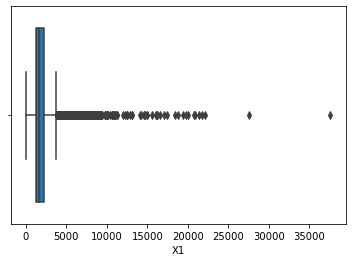

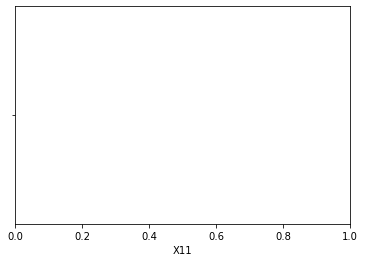

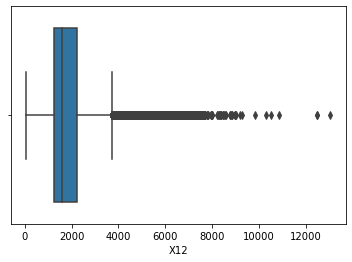

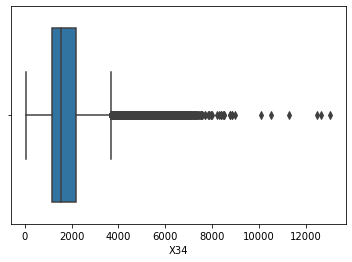

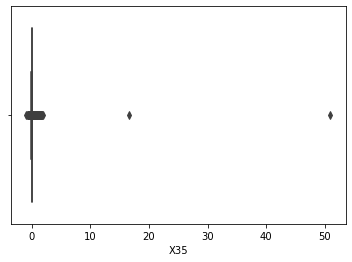

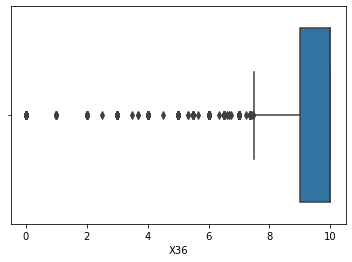

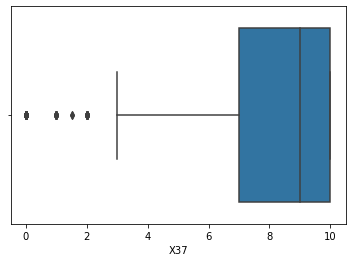

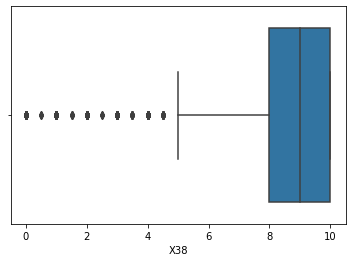

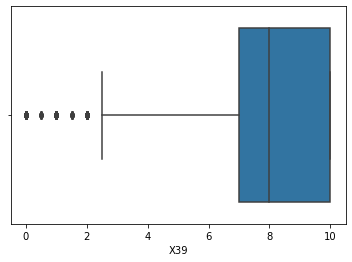

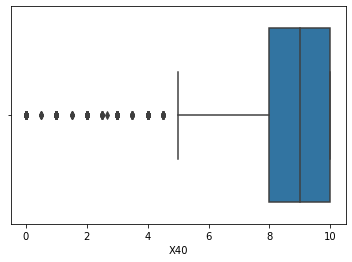

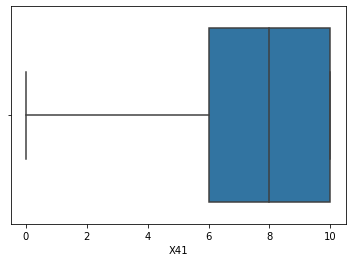

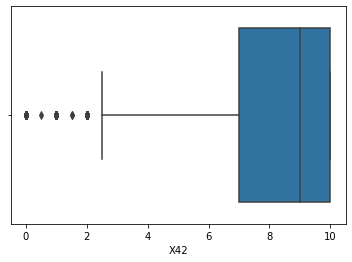

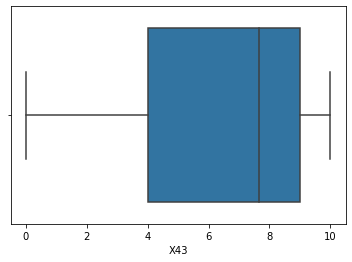

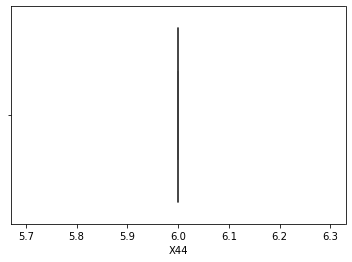

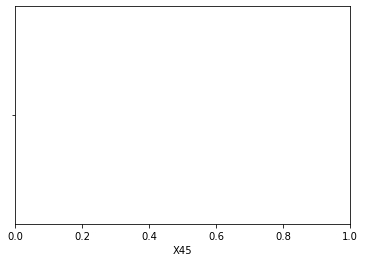

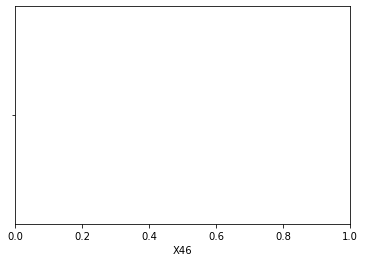

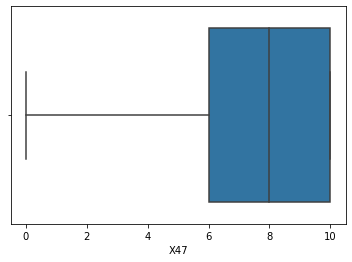

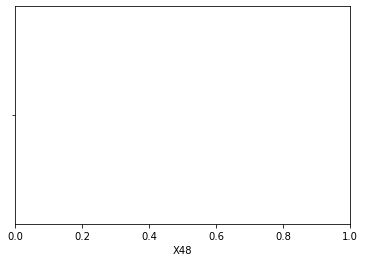

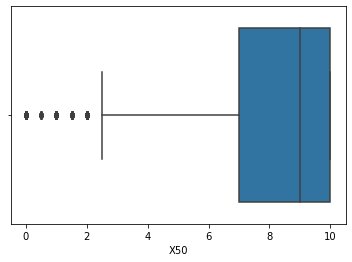

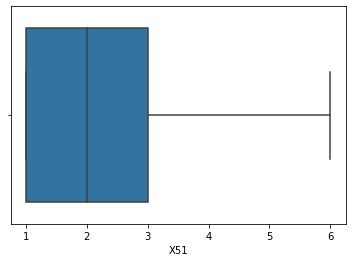

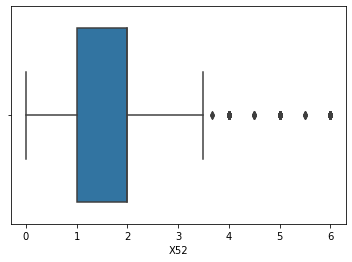

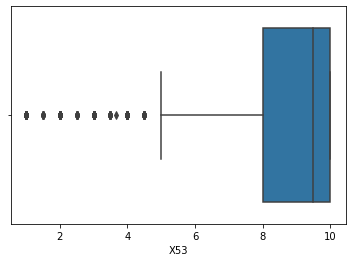

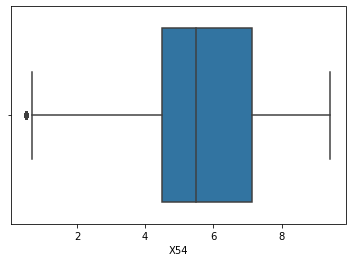

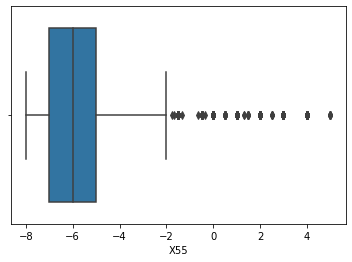

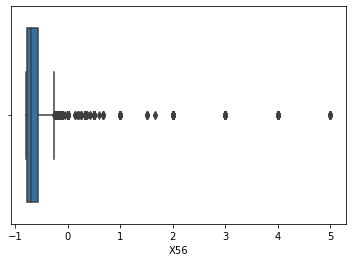

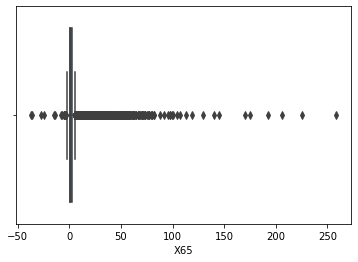

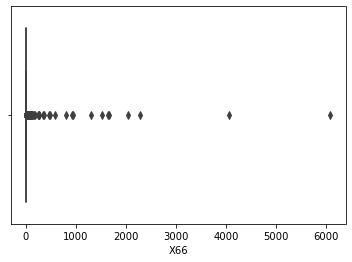

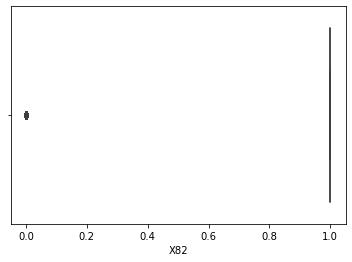

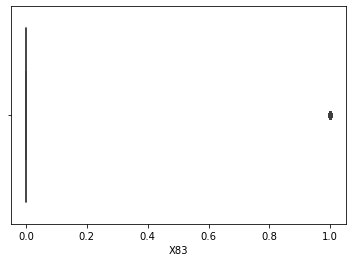

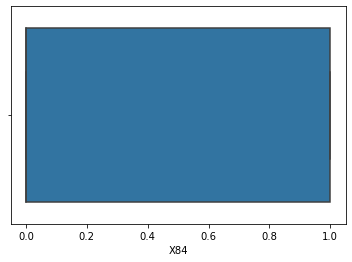

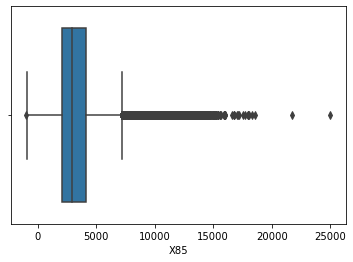

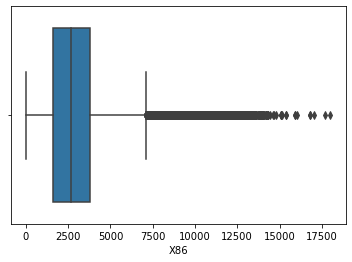

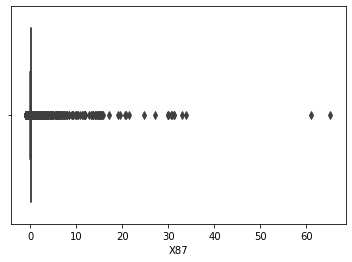

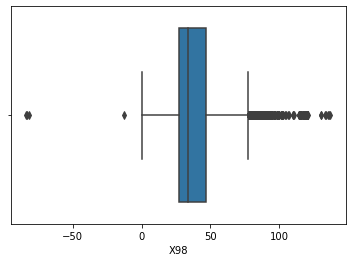

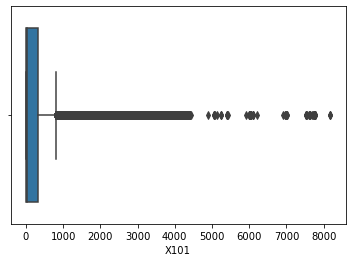

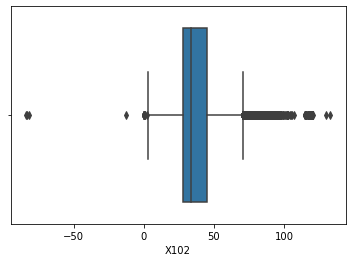

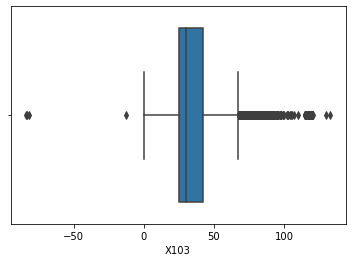

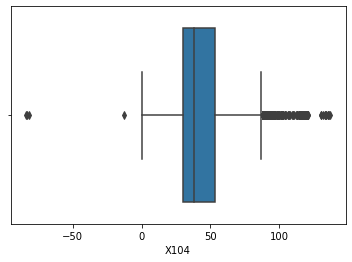

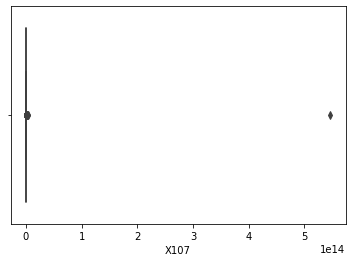

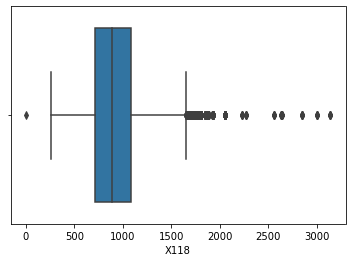

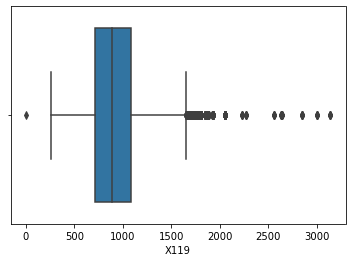

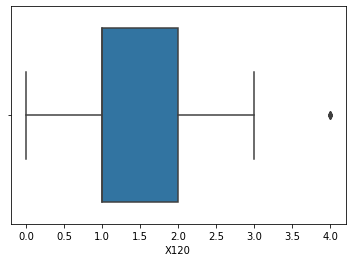

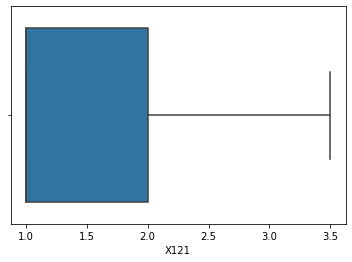

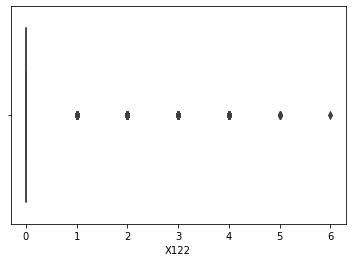

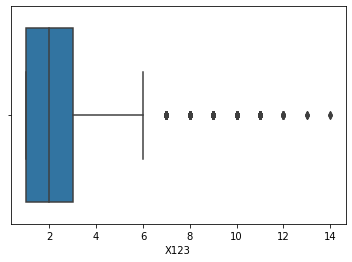

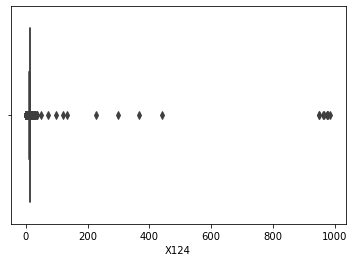

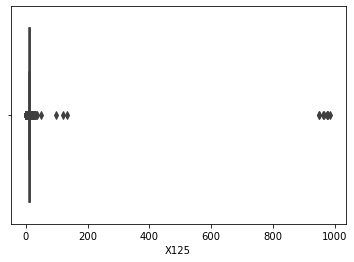

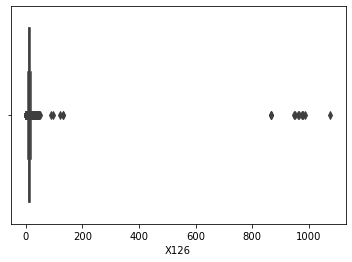

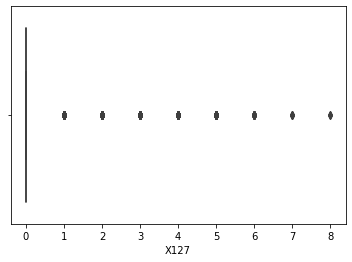

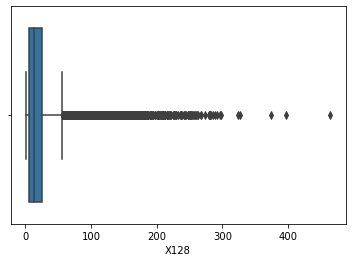

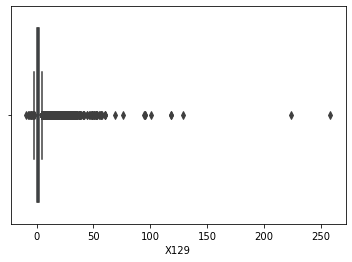

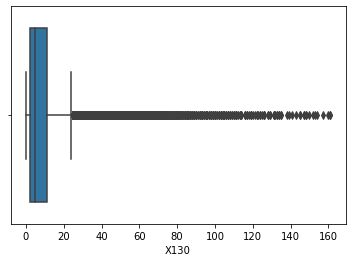

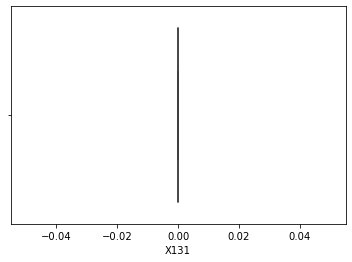

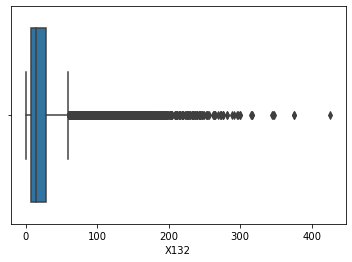

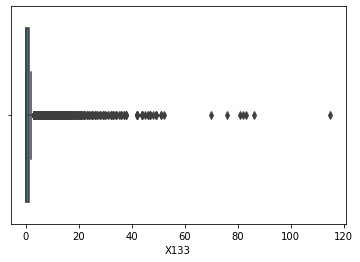

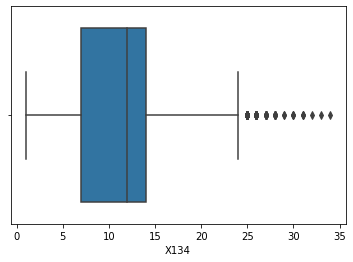

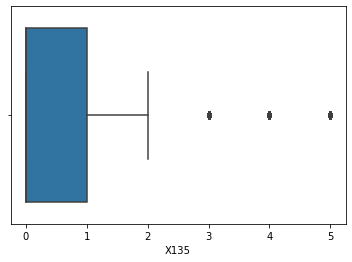

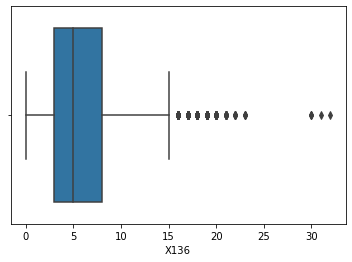

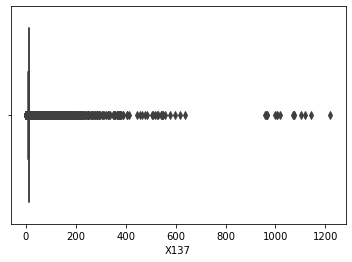

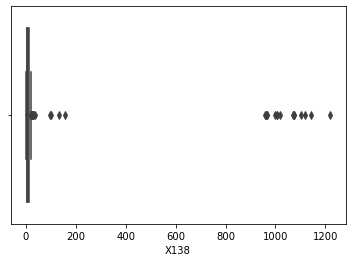

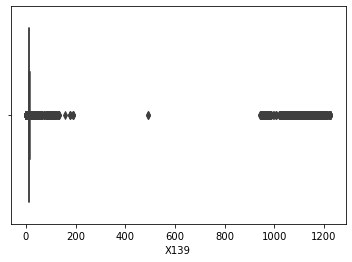

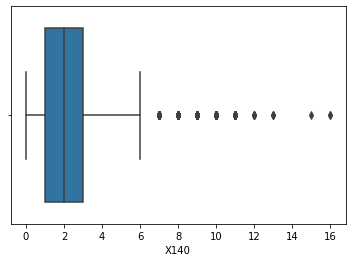

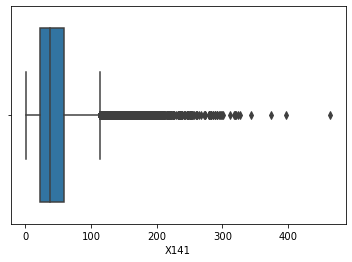

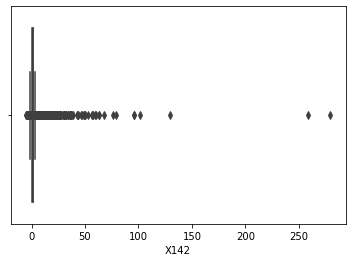

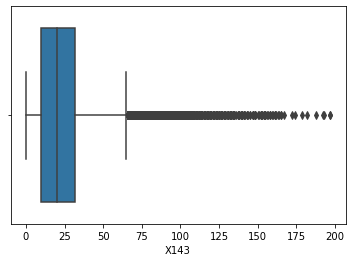

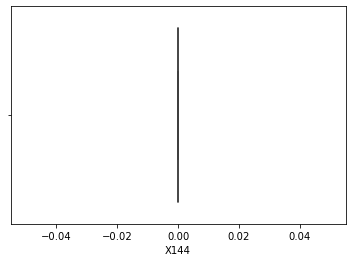

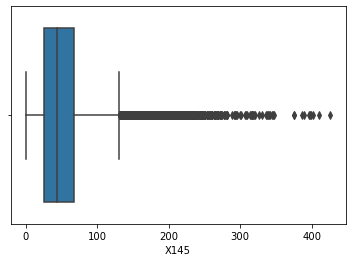

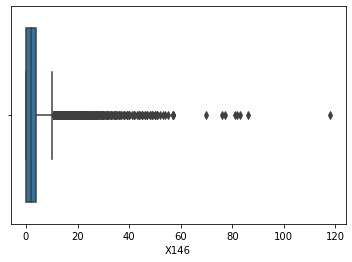

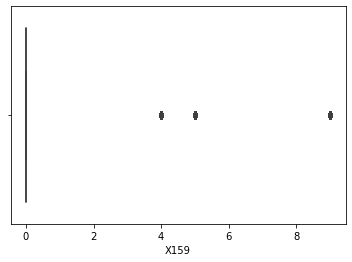

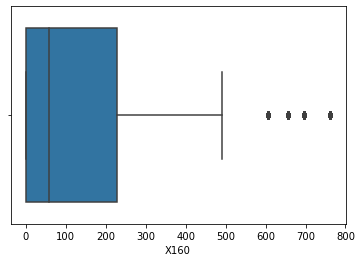

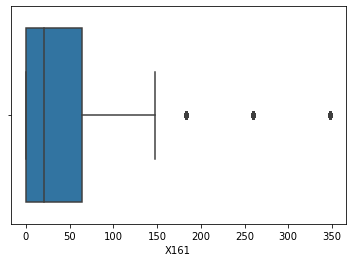

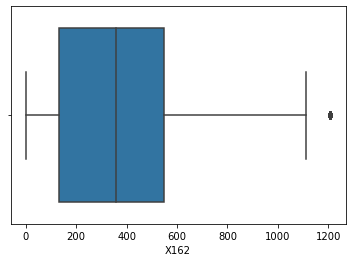

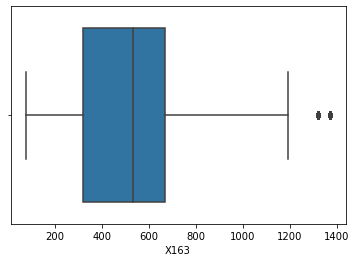

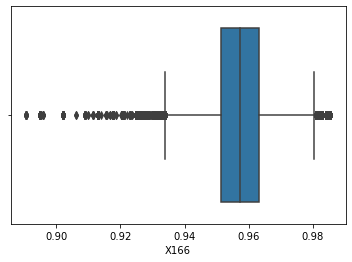

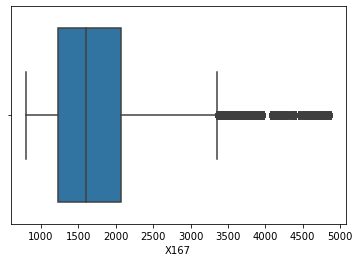

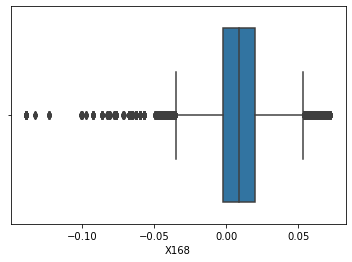

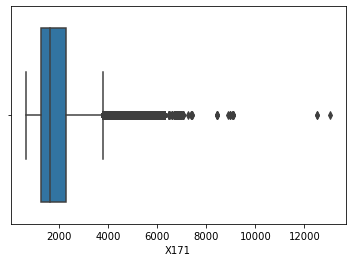

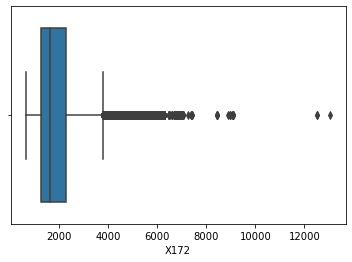

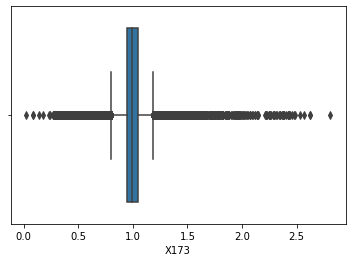

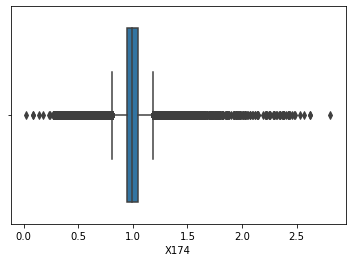

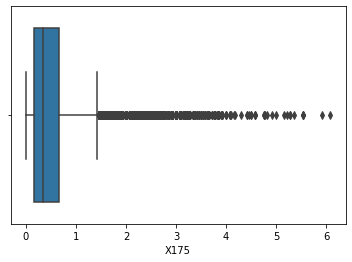

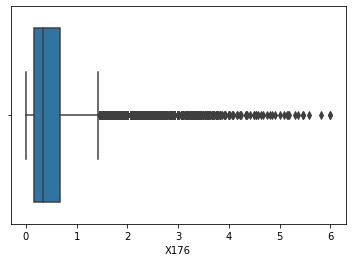

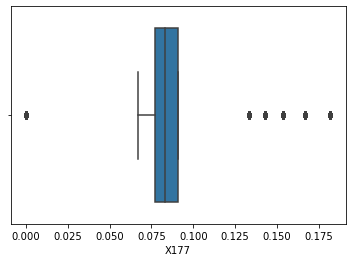

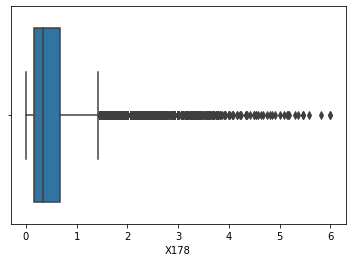

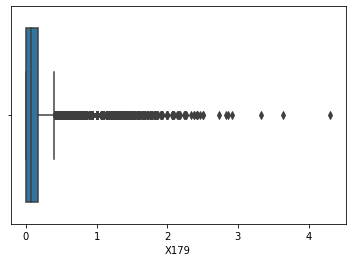

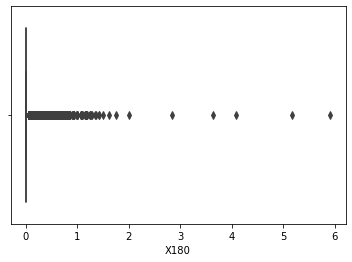

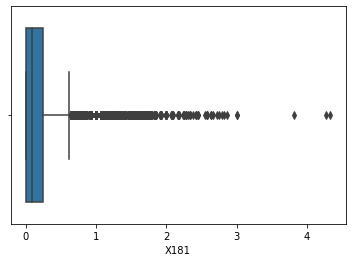

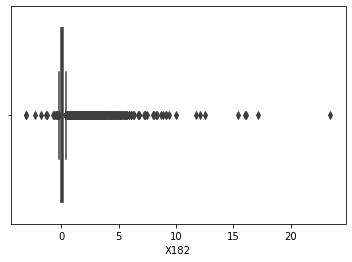

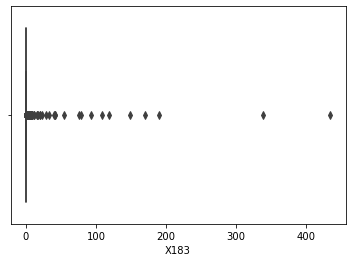

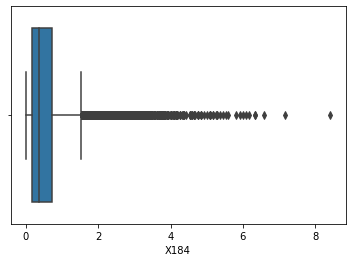

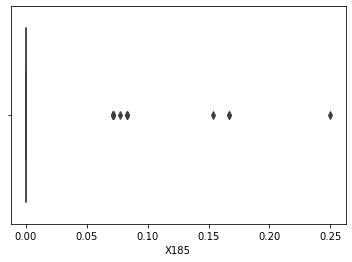

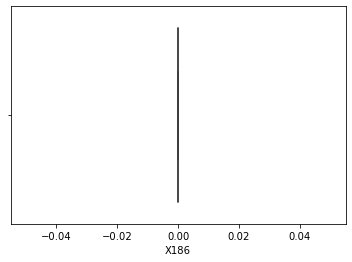

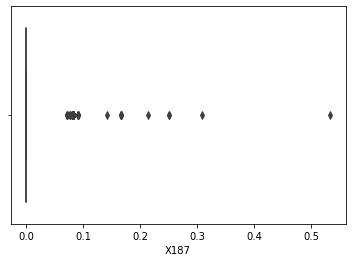

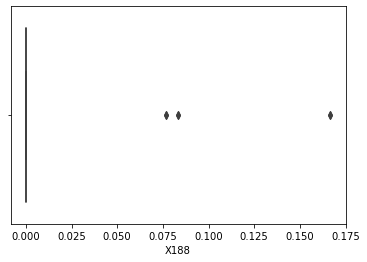

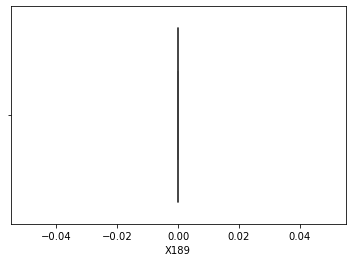

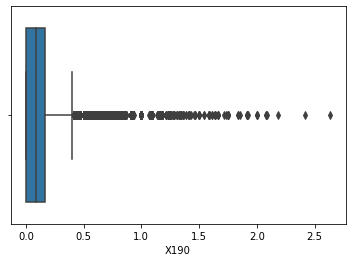

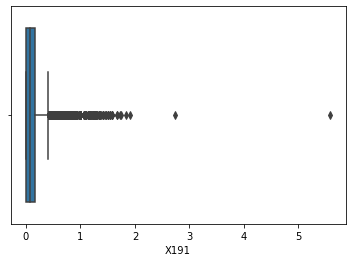

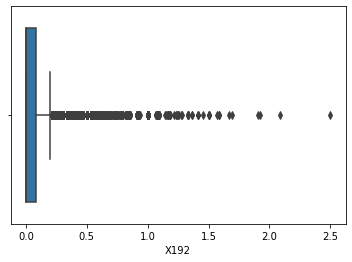

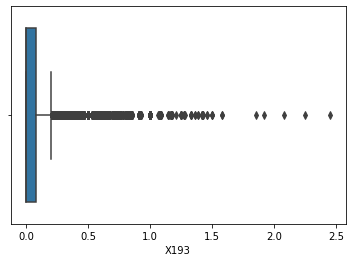

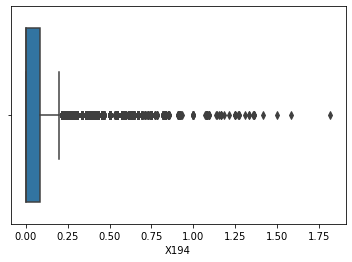

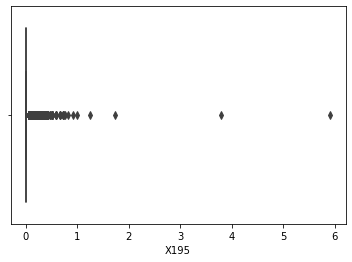

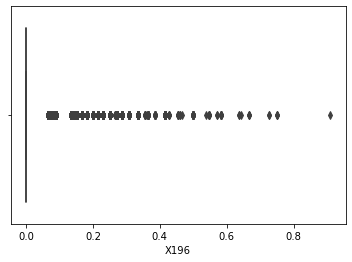

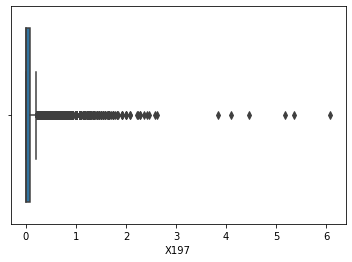

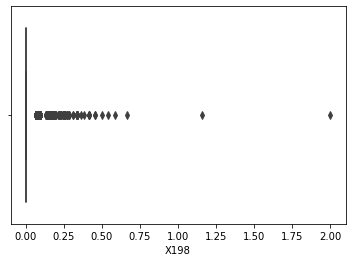

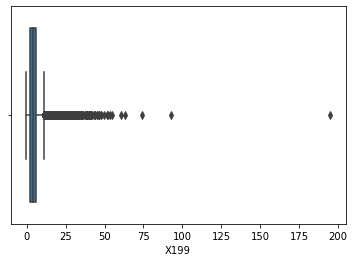

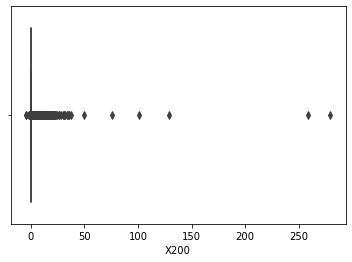

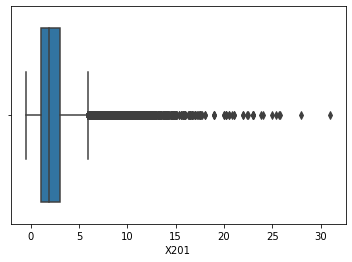

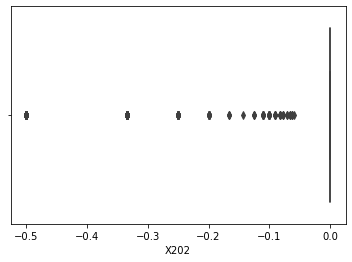

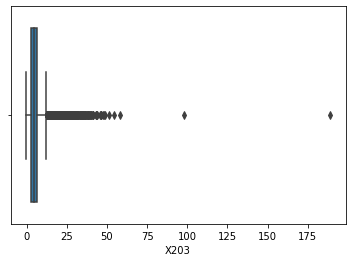

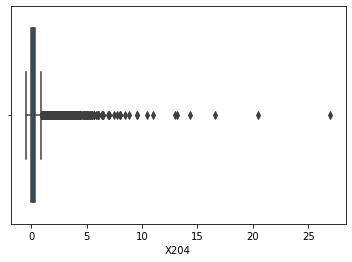

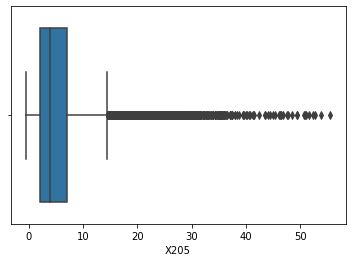

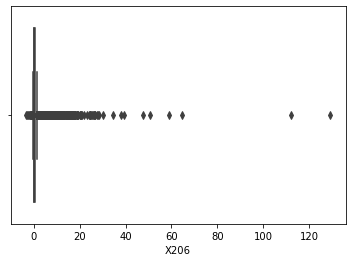

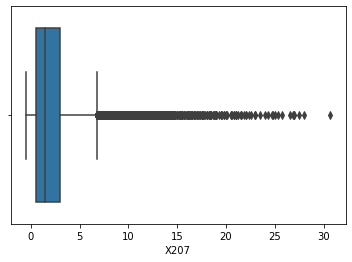

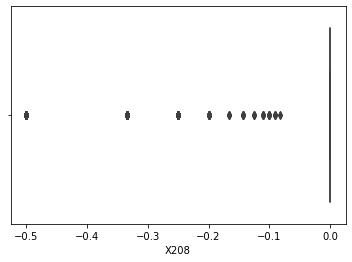

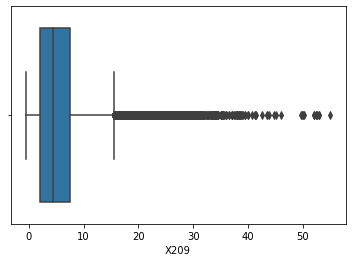

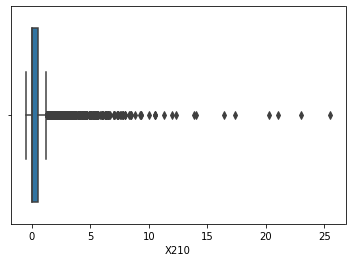

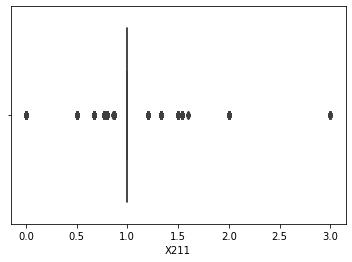

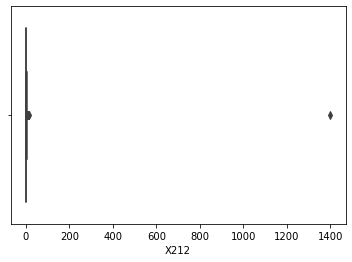

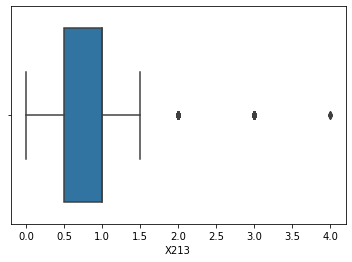

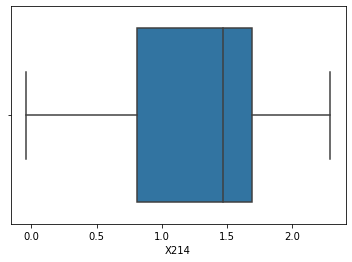

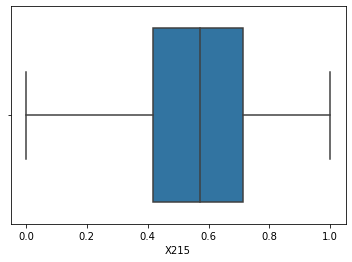

In [21]:
import warnings
warnings.filterwarnings("ignore") 
for column in df_float:
    plt.figure(figsize=(6,4))
    sns.boxplot(df_float[column])

In [22]:
for i in df_float:
    percentile25 = df_float[i].quantile(0.25)
    percentile75 = df_float[i].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df_float[i] = np.where(
    df_float[i] > upper_limit,
    upper_limit,
    np.where(
        df_float[i] < lower_limit,
        lower_limit,
        df_float[i]
    ))


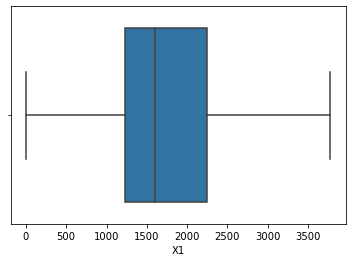

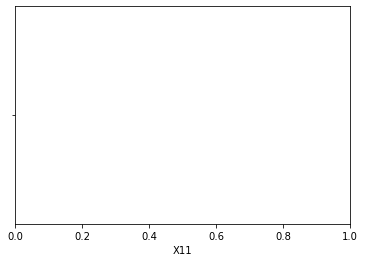

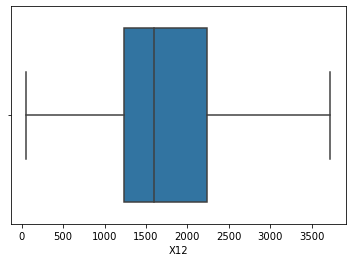

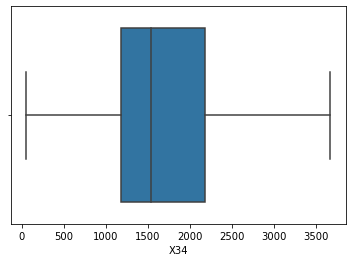

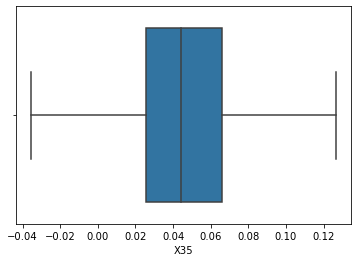

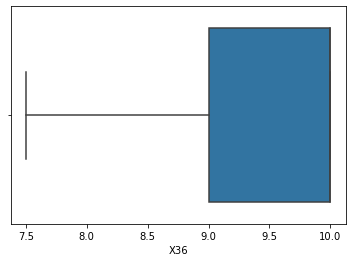

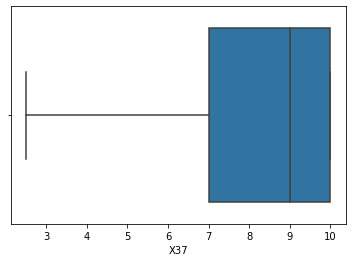

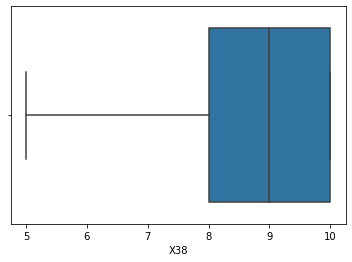

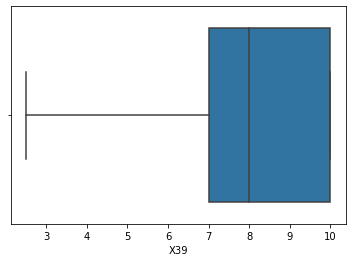

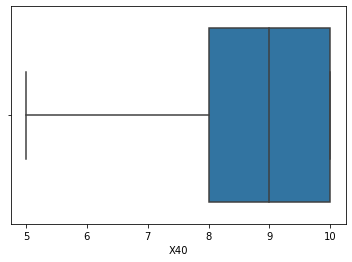

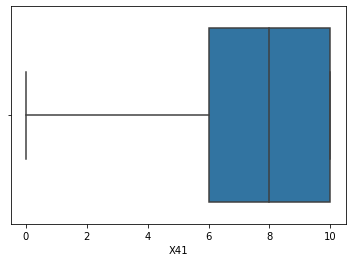

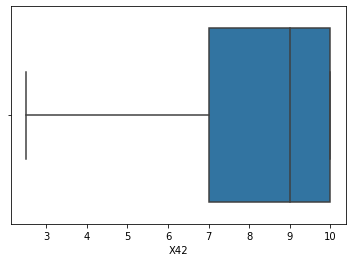

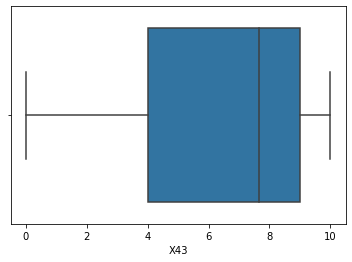

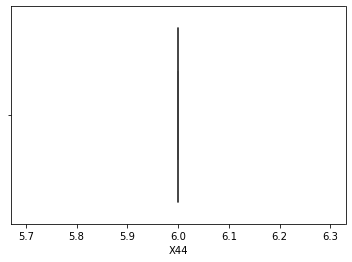

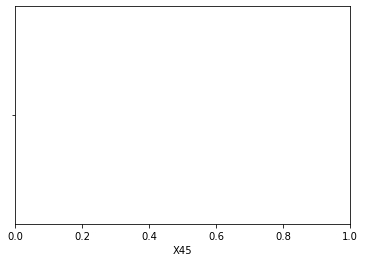

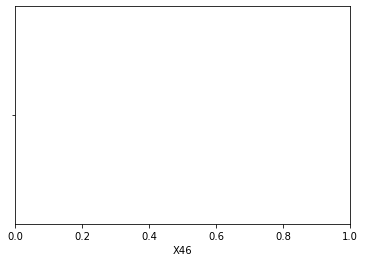

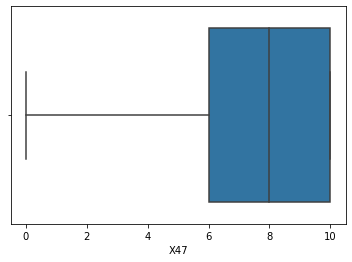

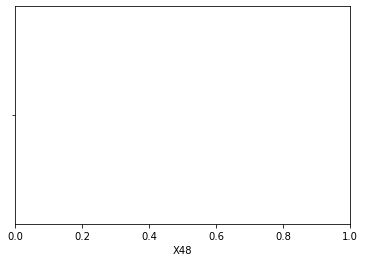

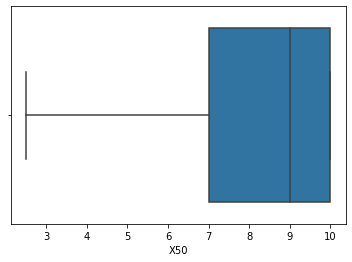

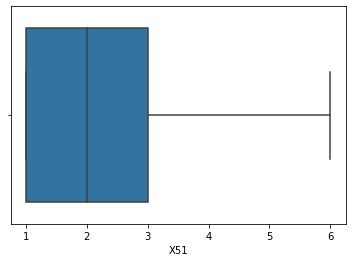

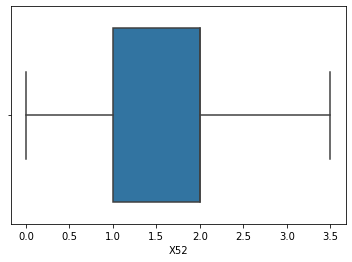

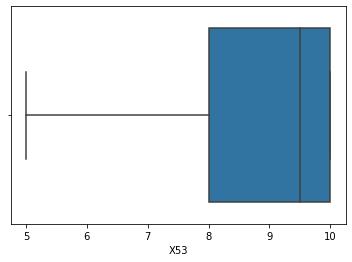

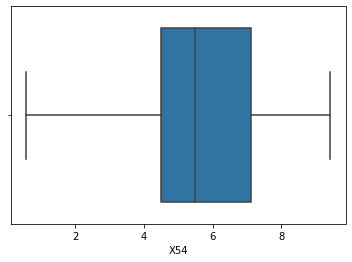

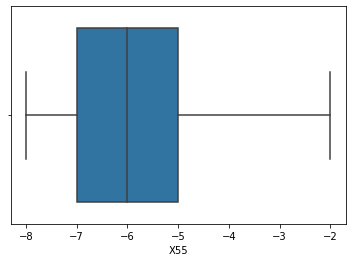

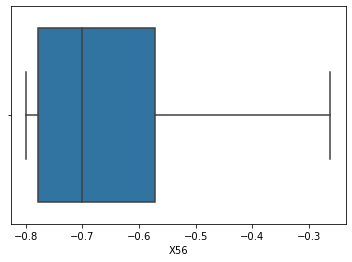

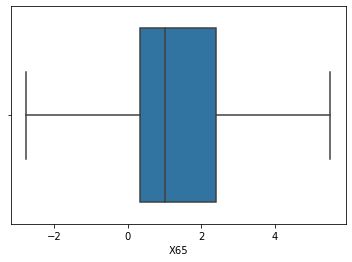

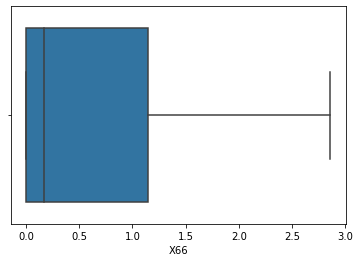

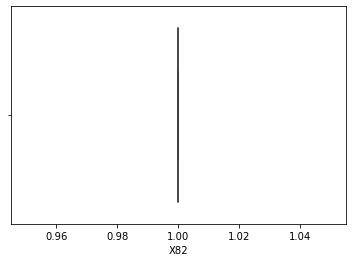

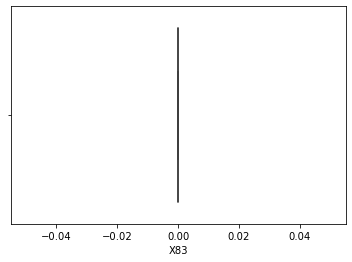

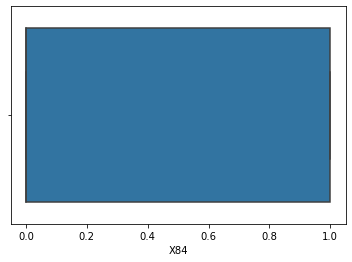

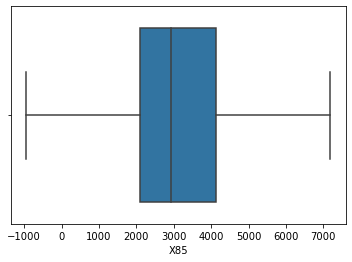

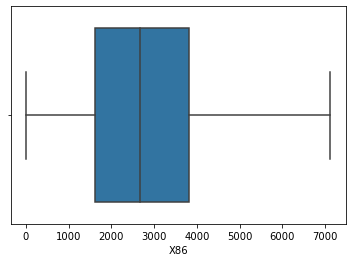

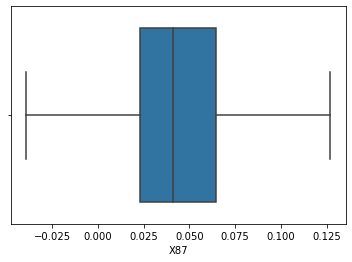

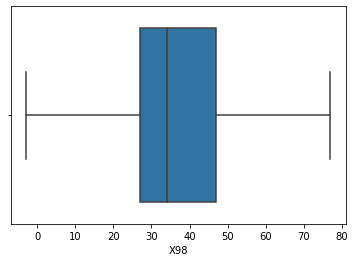

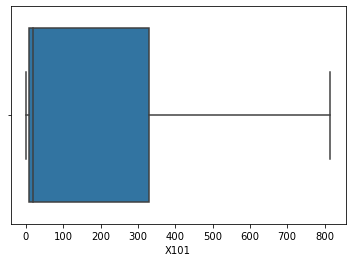

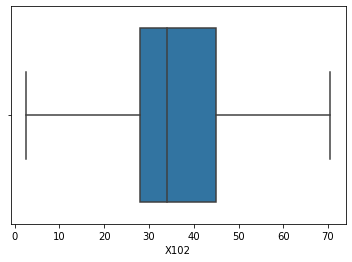

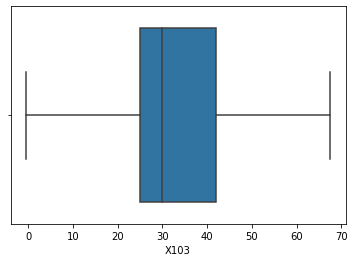

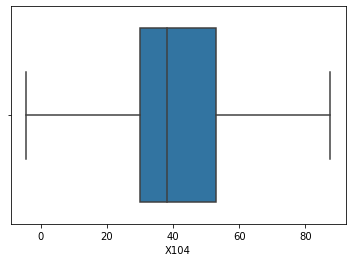

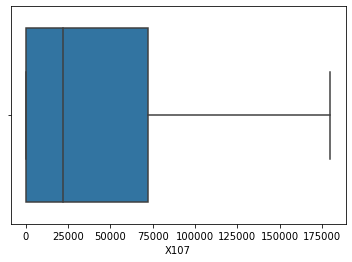

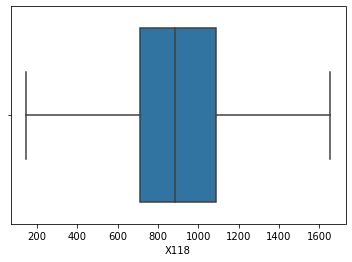

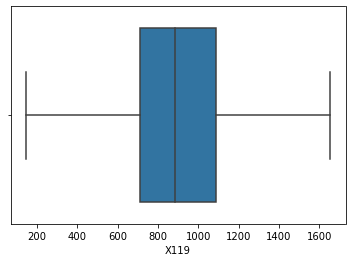

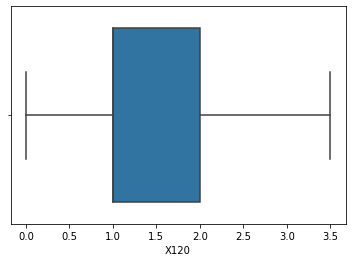

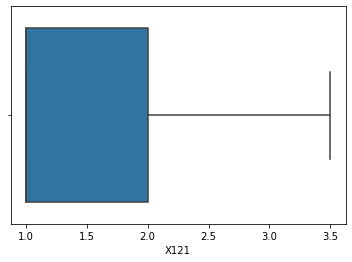

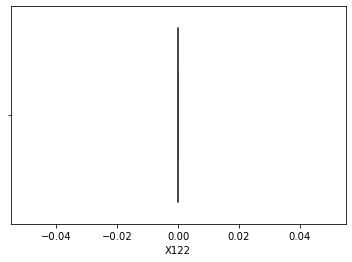

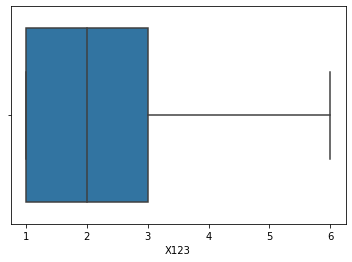

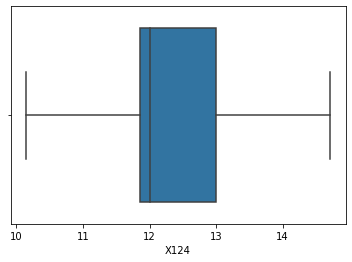

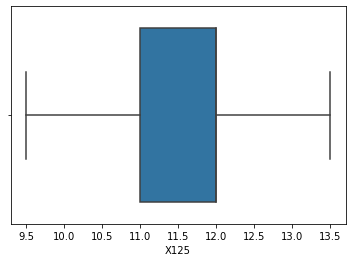

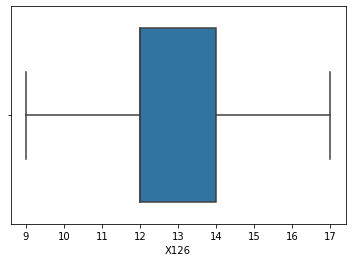

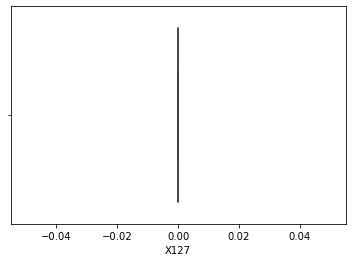

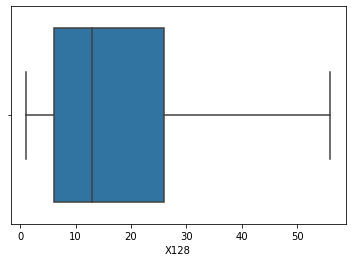

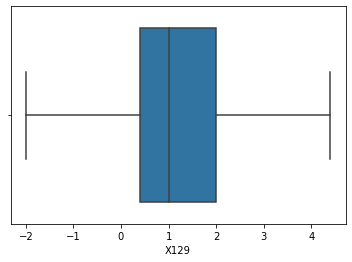

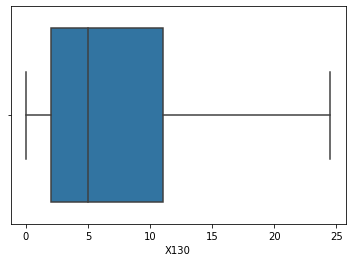

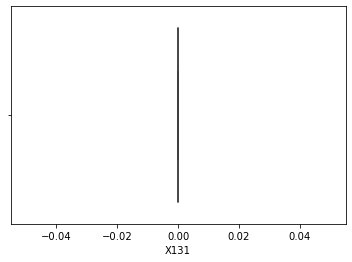

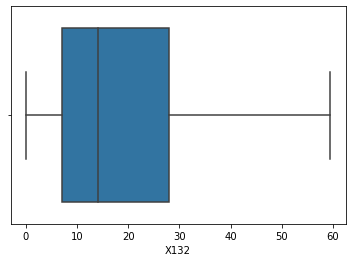

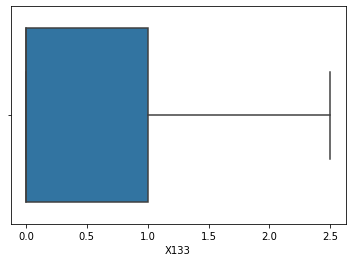

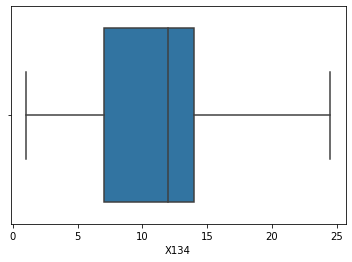

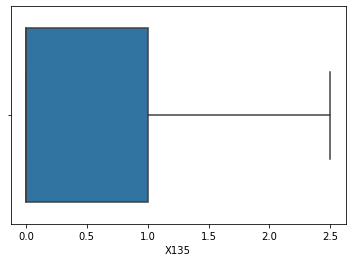

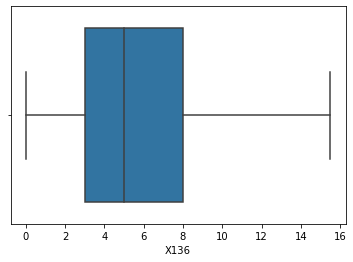

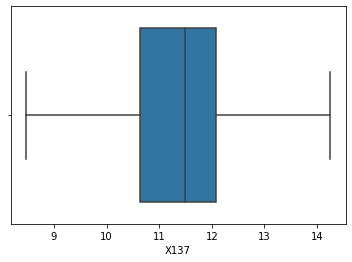

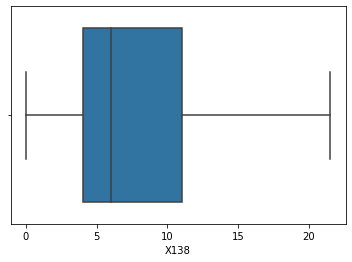

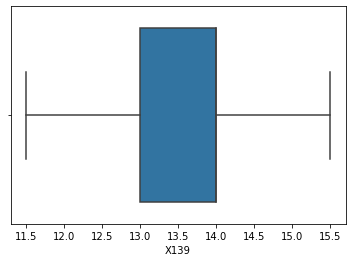

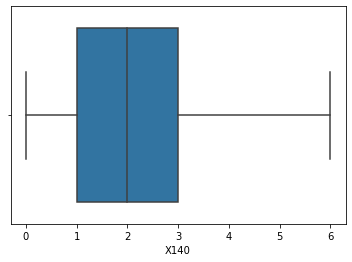

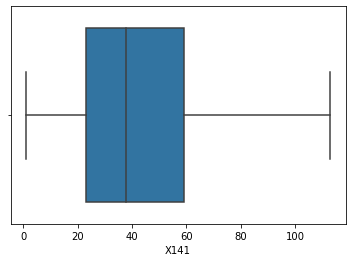

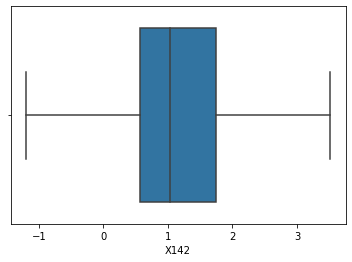

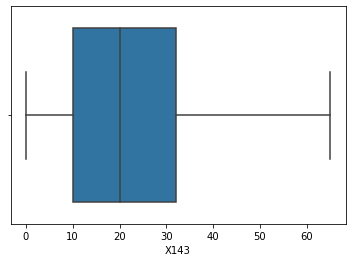

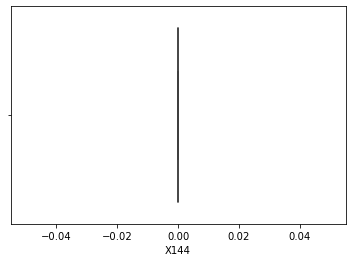

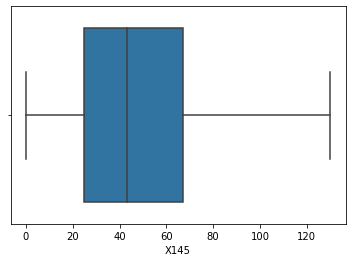

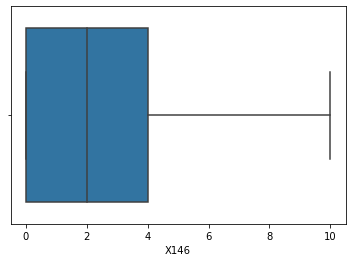

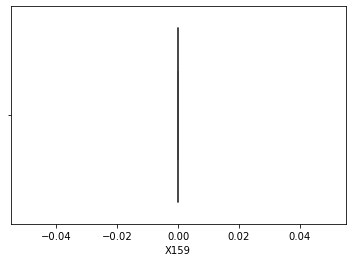

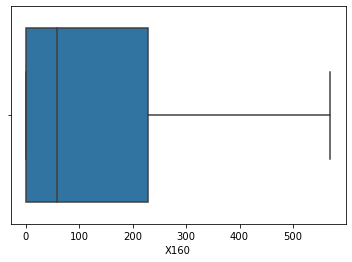

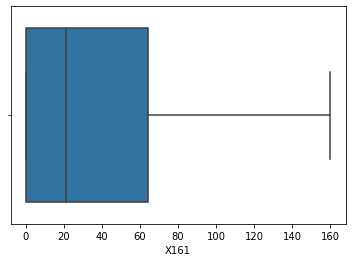

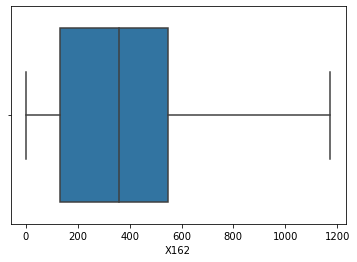

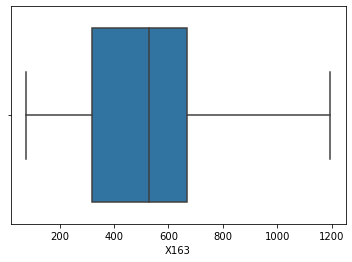

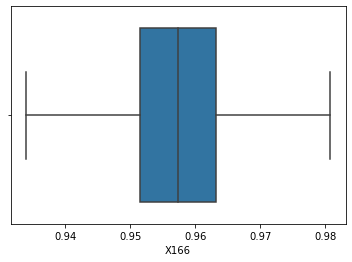

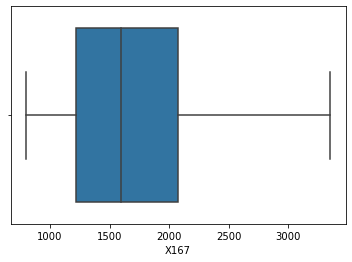

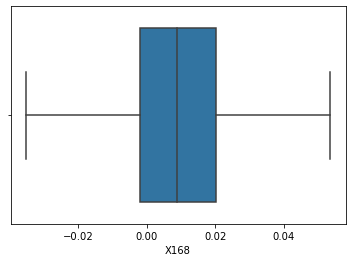

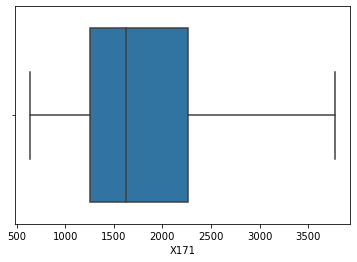

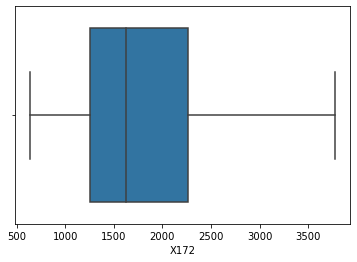

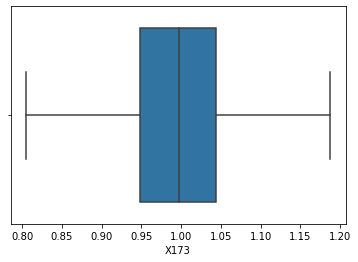

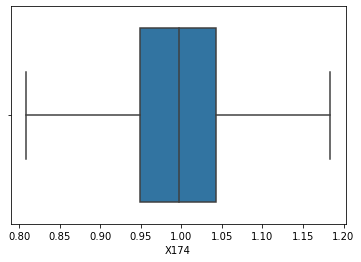

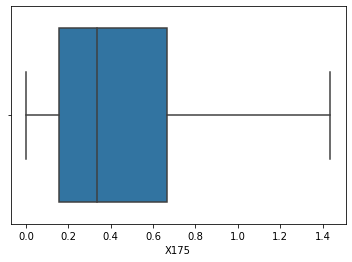

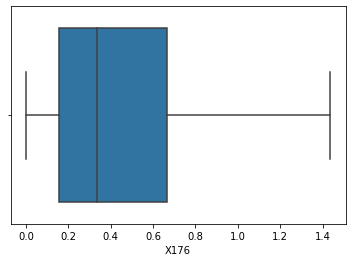

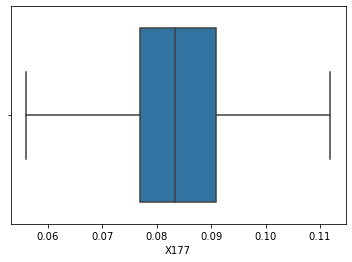

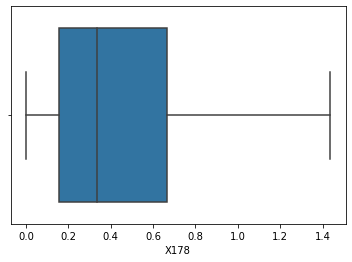

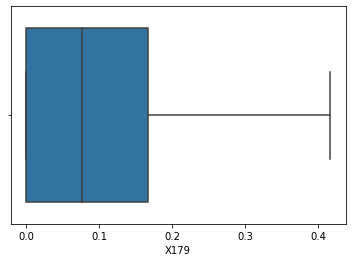

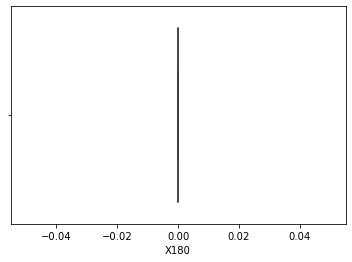

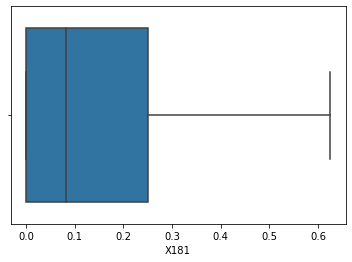

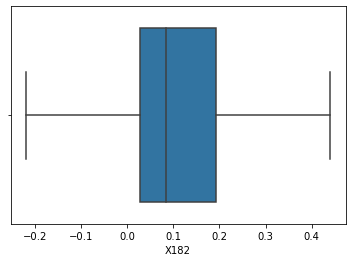

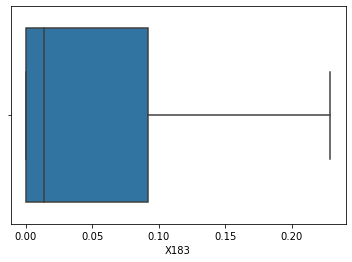

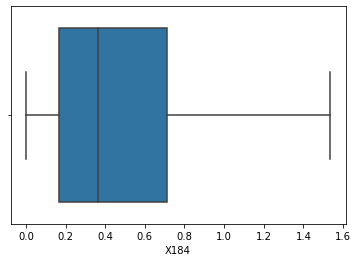

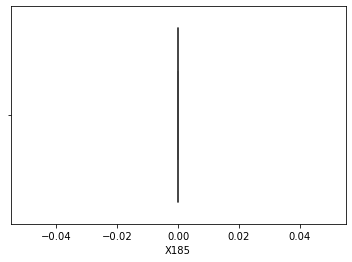

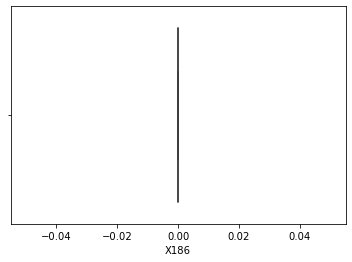

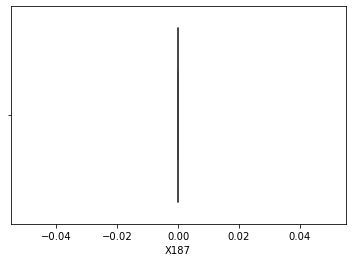

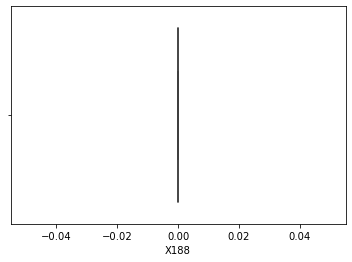

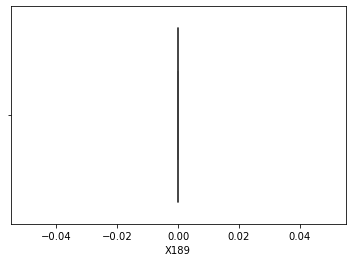

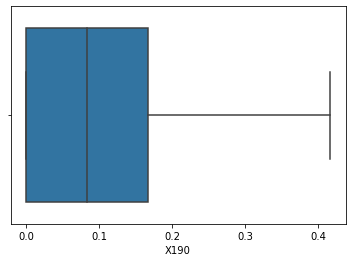

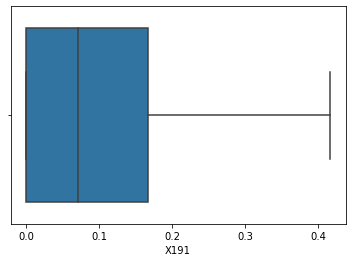

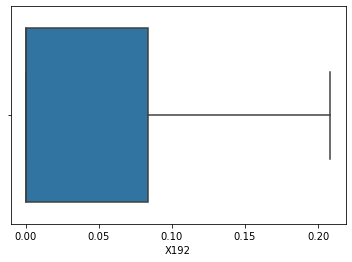

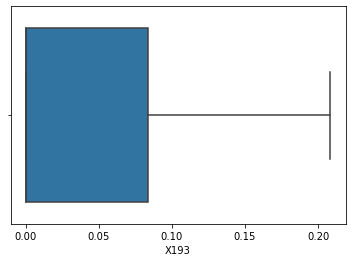

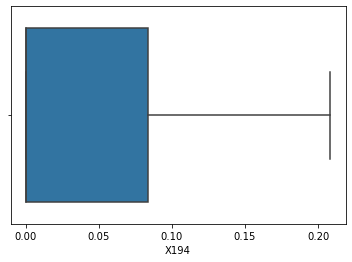

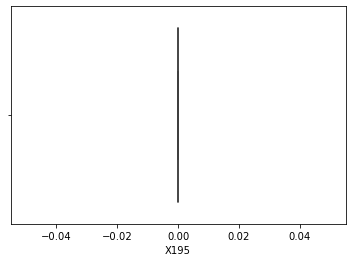

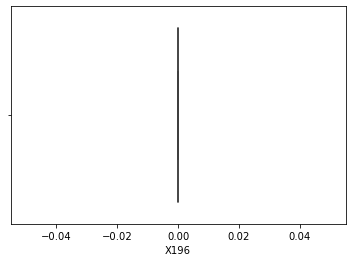

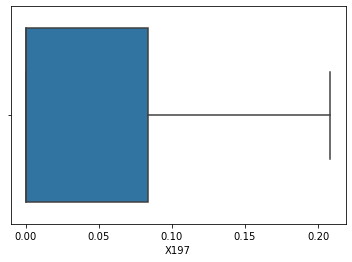

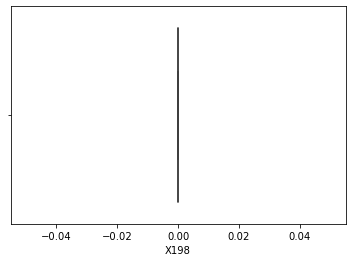

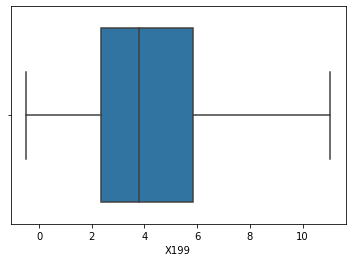

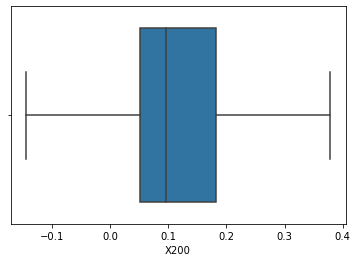

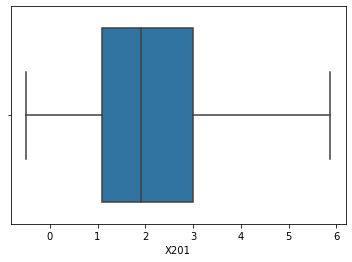

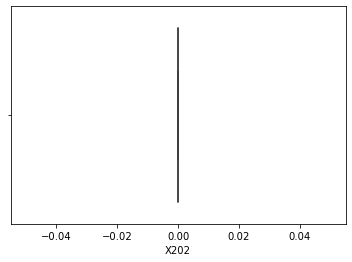

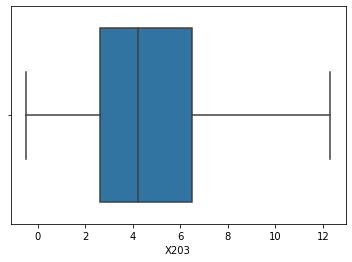

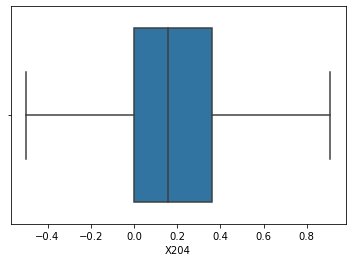

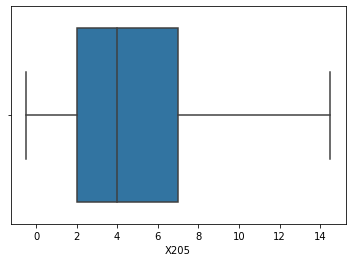

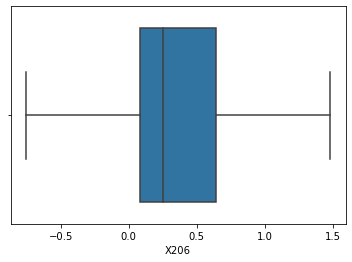

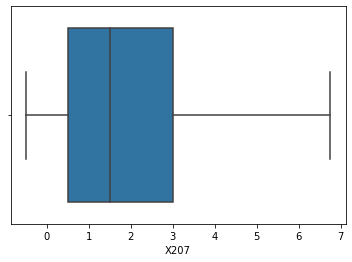

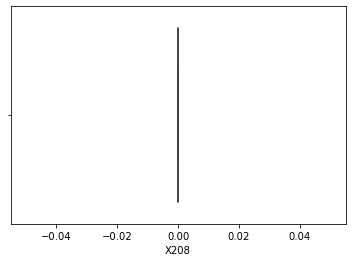

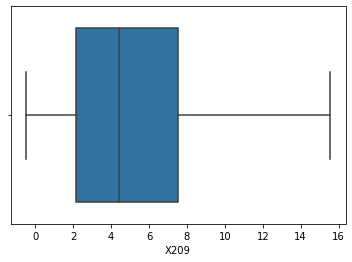

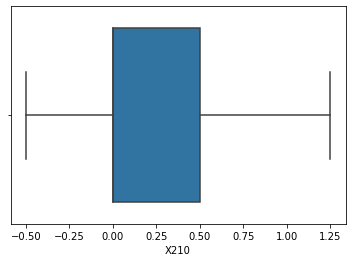

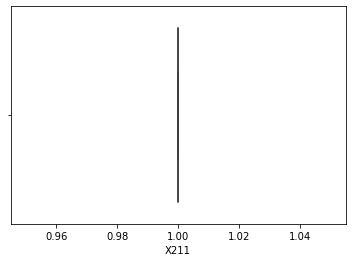

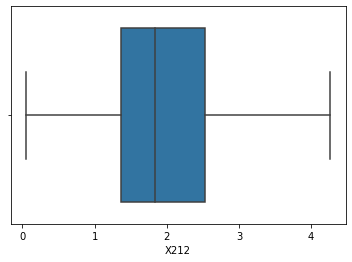

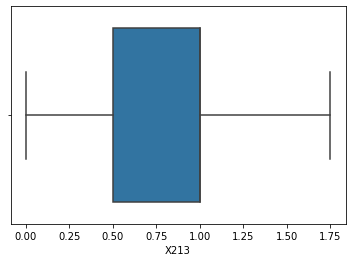

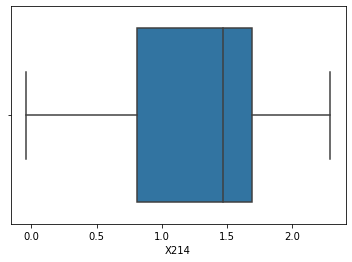

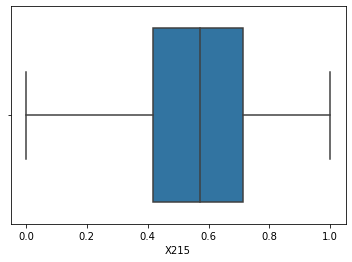

In [23]:
for column in df_float:
    plt.figure(figsize=(6,4))
    sns.boxplot(df_float[column])

### handling missing data.

In [24]:
df.stb.missing()

,missing,total,percent
X85,37511,167020,22.458987
X82,37511,167020,22.458987
X83,37511,167020,22.458987
X84,37511,167020,22.458987
X162,28179,167020,16.871632
X163,28179,167020,16.871632
X160,28179,167020,16.871632
X159,28179,167020,16.871632
X161,28179,167020,16.871632
X142,8949,167020,5.358041


In [25]:
cols=['X85','X84','X82','X83','X162','X163','X160','X159','X161','X142','X146','X145','X144','X143',
     'X141','X200','X204','X204','X203','X202','X201','X199','X215','X140','X139','X138','X137','X136','X135','X134']
for i in cols:
    df[i]= df[i].fillna(df[i].mean()) #imputing missing data with mean
    

In [26]:
df.stb.missing()

,missing,total,percent
X103,714,167020,0.427494
X102,675,167020,0.404143
X104,675,167020,0.404143
X98,485,167020,0.290384
X169,145,167020,0.086816
X170,145,167020,0.086816
X165,145,167020,0.086816
X164,145,167020,0.086816
X65,6,167020,0.003592
X152,0,167020,0.000000


In [27]:
df.dropna(inplace=True)

In [28]:
df.stb.missing()

,missing,total,percent
UID,0,166171,0.0
X149,0,166171,0.0
X151,0,166171,0.0
X152,0,166171,0.0
X153,0,166171,0.0
X154,0,166171,0.0
X155,0,166171,0.0
X156,0,166171,0.0
X157,0,166171,0.0
X158,0,166171,0.0


In [29]:
df['X85'].isna().sum()

0

In [30]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167020 entries, 0 to 167019
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   X149    167020 non-null  category
 1   X155    167020 non-null  category
 2   X156    167020 non-null  category
 3   X157    167020 non-null  category
dtypes: category(4)
memory usage: 653.0 KB


In [31]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167020 entries, 0 to 167019
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   UID     167020 non-null  object
 1   X0      167020 non-null  object
 2   X18     167020 non-null  object
 3   X99     43132 non-null   object
 4   X100    29994 non-null   object
 5   X108    59604 non-null   object
 6   X150    167020 non-null  object
 7   X151    167020 non-null  object
 8   X152    167020 non-null  object
 9   X154    167020 non-null  object
 10  X158    167020 non-null  object
 11  X164    166875 non-null  object
 12  X165    166875 non-null  object
 13  X169    166875 non-null  object
dtypes: object(14)
memory usage: 17.8+ MB


In [32]:
df['X164']= df['X164'].fillna(df['X164'].mode())

In [33]:
df['X165']= df['X165'].fillna(df['X165'].mode())

In [34]:
df['X169']= df['X169'].fillna(df['X169'].mode())

### Data Preprocessing

In [35]:
df[["X0"]].value_counts()

X0             
12 month lease     103021
14 month lease      23394
13 month lease      18705
12 Month Lease       5803
15 month lease       5483
11 month lease       4279
12 month Lease       1064
11 Month Lease        850
12 Month lease        474
3 month lease         398
14 Month Lease        315
15 Month Lease        313
13 Month Lease        277
10 month lease        262
16 month lease        202
7 month lease         127
13 month Lease        123
12 Month Term         121
14 Month lease        114
9 month lease          89
13 months              76
13 Month lease         75
6 month lease          74
15 month Lease         73
14 month Lease         59
8 month lease          50
2 month lease          44
14  month lease        40
16 month Lease         34
3 month                31
4 month lease          31
10 Month Lease         24
14 months              22
13 mont lease          18
5 month lease          16
14 month               15
14month lease          11
15 months             

In [36]:
df["X0"].unique()

array(['14 month lease', '12 month lease', '13 month lease',
       '11 month lease', '3 month lease', '16 month lease',
       '15 month lease', '6 month lease', '4 month lease',
       '10 month lease', '7 month lease', '24 month', '8 month lease',
       '9 month lease', '18 month lease', '17 month lease', '14 month',
       '14  month lease', '1 month lease', '15 monh lease', '3 month',
       '14month lease', '2 month lease', '5 month lease',
       '12 Month Lease', '11 Month Lease', '15 Month Lease',
       '13 Month Lease', '10 Month Lease', '3 Month Lease',
       '6 Month Lease', '14 Month Lease', '16 month  lease',
       '13 mont lease', '13 Months', '13 month Lease', '14 month leases',
       '6 months', '13 months', '15 months', '14 months',
       '12 month Lease', '12 Month Term', '11 Month Term', '6 Month Term',
       '16 Month Term', '12 Month lease', '13 Month lease',
       '14 Month lease', '5 Month lease', '6 Month lease',
       '9 Month Lease', '8 Month Lease',

In [37]:
#lowering string value
df["X0"]=df["X0"].str.lower()

In [38]:
#cleaning data
df["X0"].replace({"24 month": "24 month lease", "14 month": "14 month lease", "14  month lease": "14 month lease", 
                  "15 monh lease": "15 month lease", "3 month": "3 month lease", "14month lease": "14 month lease",
                  "13 months": "13 month lease", "14 month leases": "14 month lease",
                  "13 mont lease": "13 month lease","13 months": "13 month lease ","14 month leases": "14 month lease","6 months": "6 month lease",
                  "15 months": "15 month lease","14 months": "14 month lease",
                  "12 month term": "12 month lease","11 Month Term": "11 month lease","6 month term": "6 month lease",
                  "16 month term": "16 month lease","3 months": "3 month lease",
                  "11 month term":"11 month lease","12  month lease":"12 month lease",
                  "13 month lease ":"13 month lease","16 month  lease":"16 month lease"}, inplace=True)

In [39]:
df["X0"]=df["X0"].str.strip().str.lower()

In [40]:
df["X0"].unique()

array(['14 month lease', '12 month lease', '13 month lease',
       '11 month lease', '3 month lease', '16 month lease',
       '15 month lease', '6 month lease', '4 month lease',
       '10 month lease', '7 month lease', '24 month lease',
       '8 month lease', '9 month lease', '18 month lease',
       '17 month lease', '1 month lease', '2 month lease',
       '5 month lease'], dtype=object)

In [41]:
df["X150"]=df["X150"].str.strip().str.title()

In [42]:
df["X151"]=df["X151"].str.strip().str.upper()

In [43]:
df["X154"]=df["X154"].str.strip().str.title()

In [44]:
df["X154"].replace({"Austin TX": "Austin","Dallas TX":"Dallas","Monterey (Salinas)":"Monterey","Other Florida":"Florida","Other SoCal":"SoCal",
                    "Portland, OR":"Portland","Seattle,WA":"Seattle","Tampa FL":"Tampa"},inplace=True)


df["X154"]=df["X154"].str.strip().str.title()

In [45]:
df['X158']=df['X158'].str.split("/").str.get(0).str.strip().str.lower()

## Exploratory Data Analysis

In [46]:
df.groupby(["X0","Target_ChurnFlag"])[["Target_ChurnFlag"]].sum()

Target_ChurnFlag
X0             Target_ChurnFlag                  
1 month lease  0                                0
10 month lease 0                                0
               1                              122
11 month lease 0                                0
               1                             2276
12 month lease 0                                0
               1                            41779
13 month lease 0                                0
               1                             8483
14 month lease 0                                0
               1                            10914
15 month lease 0                                0
               1                             2559
16 month lease 0                                0
               1                              108
17 month lease 0                                0
               1                                1
18 month lease 1                                2
2 month lease  0                                0
               1                               24
24 month lease 0                                0
               1                                1
3 month lease  0                                0
               1                              178
4 month lease  0                                0
               1                               22
5 month lease  0                                0
               1                                6
6 month lease  0                                0
               1                               38
7 month lease  0                                0
               1                               40
8 month lease  0                                0
               1                               18
9 month lease  0                                0
               1                               44

- customers signed for '12 month lease', '14 month lease' are more likely to churn.

In [47]:
df.groupby('X150')['X150'].count().sort_values(ascending=False)

X150
Alexandria           12230
Addison               8654
Salinas               6571
Costa Mesa            5479
Nashville             5216
New York              5203
Newport Beach         5092
Plano                 4157
San Francisco         3985
Huntington Beach      3870
Altamonte Springs     3782
Washington            3761
Woodbridge            3449
Marina Del Rey        3322
Silver Spring         3282
St Petersburg         3190
Bellevue              3188
Cedar Park            2762
Orlando               2669
Greenacres            2611
Arlington             2538
Austin                2533
Henrico               2510
Towson                2442
Seattle               2121
Tampa                 2054
Santa Clara           2044
Dunedin               2018
Braintree             2015
Boston                1957
Woburn                1770
Herndon               1639
Franklin              1628
Rancho Cucamonga      1614
San Mateo             1610
Renton                1604
Tewksbury             1

In [48]:
df.groupby(["X150","Target_ChurnFlag"])[["Target_ChurnFlag"]].sum()

Target_ChurnFlag
X150              Target_ChurnFlag                  
Addison           0                                0
                  1                             3890
Alexandria        0                                0
                  1                             4075
Altamonte Springs 0                                0
                  1                             1639
Anaheim           0                                0
                  1                              416
Arlington         0                                0
                  1                              951
Austin            0                                0
                  1                             1065
Baltimore         0                                0
                  1                              536
Bel Air           0                                0
                  1                              375
Bellevue          0                                0
                  1                             1293
Boston            0                                0
                  1                              836
Braintree         0                                0
                  1                              593
Brandon           0                                0
                  1                              618
Brooklyn          0                                0
                  1                              114
Cedar Park        0                                0
                  1                              878
Chester           0                                0
                  1                              416
Clearwater        0                                0
                  1                              353
College Park      0                                0
                  1                              432
Costa Mesa        0                                0
                  1                             2516
Dallas            0                                0
                  1                              470
Denver            0                                0
                  1                              312
Dunedin           0                                0
                  1                              817
Everett           0                                0
                  1                              432
Franklin          0                                0
                  1                              573
Glen Allen        0                                0
                  1                              442
Greenacres        0                                0
                  1                              930
Hendersonville    0                                0
                  1                              532
Henrico           0                                0
                  1                              929
Hermitage         0                                0
                  1                              537
Herndon           0                                0
                  1                              600
Huntington Beach  0                                0
                  1                             1690
King Of Prussia   0                                0
                  1                              117
La Mirada         0                                0
                  1                              272
Lake Oswego       0                                0
                  1                              521
Madison           0                                0
                  1                              331
Manassas          0                                0
                  1                              599
Marina Del Rey    0                                0
                  1                             1403
Mercer Island     0                                0
                  1                              434
Mill Cre

- customers from Alexandria, Addison, Newport Beach are more likely to churn.

In [49]:
df.groupby('X157')['X157'].count().sort_values(ascending=False)

X157
suburban    132098
urban        34073
Name: X157, dtype: int64

- large number of customers are from suburban region

In [50]:
df.groupby(["X157","Target_ChurnFlag"])[["Target_ChurnFlag"]].sum()

Target_ChurnFlag
X157     Target_ChurnFlag                  
suburban 0                                0
         1                            52332
urban    0                                0
         1                            14283

- suburban have higher churning rate

In [51]:
df["X10"].value_counts()

False    166171
Name: X10, dtype: int64

In [52]:
df.groupby('X151')['X151'].count().sort_values(ascending=False)

X151
CA    41106
VA    27383
FL    23866
TX    19292
MA    11546
WA    10795
TN    10330
MD     9304
NY     5538
DC     3761
OR     2076
CO      716
PA      458
Name: X151, dtype: int64

In [53]:
df.groupby(["X151","Target_ChurnFlag"])[["Target_ChurnFlag"]].sum()

Target_ChurnFlag
X151 Target_ChurnFlag                  
CA   0                                0
     1                            17907
CO   0                                0
     1                              312
DC   0                                0
     1                             1392
FL   0                                0
     1                             9976
MA   0                                0
     1                             4076
MD   0                                0
     1                             3491
NY   0                                0
     1                             2222
OR   0                                0
     1                              815
PA   0                                0
     1                              117
TN   0                                0
     1                             4036
TX   0                                0
     1                             7961
VA   0                                0
     1                             9746
WA   0                                0
     1                             4564

- customers from CA, FL, VA are more likely to churn

In [54]:
df["X149"].value_counts()

ACTIVE    166171
Name: X149, dtype: int64

In [55]:
df.groupby('X154')['X154'].count().sort_values(ascending=False)

X154
Metro Dc            29415
Orange County       17030
Dallas Tx           13997
Boston              11546
Seattle,Wa          10795
Tampa Fl            10715
Sf Bay Area         10575
Orlando             10540
Nashville Tn        10330
Monterey             6571
Richmond             6022
New York             5538
Austin Tx            5295
Baltimore            5011
La County            3941
Florida              2611
Other Socal          2509
Portland, Or         2076
Denver                716
San Diego County      480
Philadelphia          458
Name: X154, dtype: int64

In [56]:
df.groupby(["X154","Target_ChurnFlag"])[["Target_ChurnFlag"]].sum()

Target_ChurnFlag
X154             Target_ChurnFlag                  
Austin Tx        0                                0
                 1                             1943
Baltimore        0                                0
                 1                             1891
Boston           0                                0
                 1                             4076
Dallas Tx        0                                0
                 1                             6018
Denver           0                                0
                 1                              312
Florida          0                                0
                 1                              930
La County        0                                0
                 1                             1675
Metro Dc         0                                0
                 1                            10507
Monterey         0                                0
                 1                             2541
Nashville Tn     0                                0
                 1                             4036
New York         0                                0
                 1                             2222
Orange County    0                                0
                 1                             7772
Orlando          0                                0
                 1                             4537
Other Socal      0                                0
                 1                             1046
Philadelphia     0                                0
                 1                              117
Portland, Or     0                                0
                 1                              815
Richmond         0                                0
                 1                             2231
San Diego County 0                                0
                 1                              200
Seattle,Wa       0                                0
                 1                             4564
Sf Bay Area      0                                0
                 1                             4673
Tampa Fl         0                                0
                 1                             4509

- Metro Dc, Dallas Tx customers has high churning rate

In [57]:
# The frequency of the dependent variable
df[["Target_ChurnFlag"]].value_counts()

Target_ChurnFlag
0                   99556
1                   66615
dtype: int64

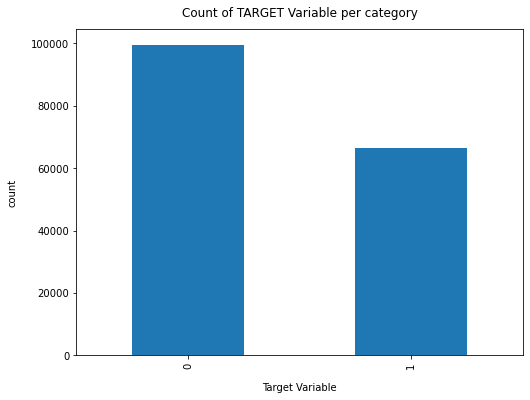

In [58]:
df['Target_ChurnFlag'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.xlabel("Target Variable", labelpad=14)
plt.ylabel("count", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [59]:
#percentage of Target_ChurnFlag
100*df['Target_ChurnFlag'].value_counts()/len(df['Target_ChurnFlag'])

0    59.911778
1    40.088222
Name: Target_ChurnFlag, dtype: float64

In [60]:
pd.set_option('display.max_rows',217)
df.isna().sum() #checking for null value

UID                 0
X0                  0
X1                  0
X2                  0
X3                  0
X5                  0
X6                  0
X10                 0
X12                 0
X13                 0
X14                 0
X15                 0
X17                 0
X18                 0
X19                 0
X20                 0
X21                 0
X22                 0
X23                 0
X24                 0
X25                 0
X26                 0
X27                 0
Target_ChurnFlag    0
X29                 0
X30                 0
X31                 0
X32                 0
X33                 0
X49                 0
X57                 0
X58                 0
X59                 0
X60                 0
X61                 0
X62                 0
X63                 0
X64                 0
X65                 0
X66                 0
X67                 0
X68                 0
X69                 0
X70                 0
X71                 0
X72       

<AxesSubplot:xlabel='X157', ylabel='count'>

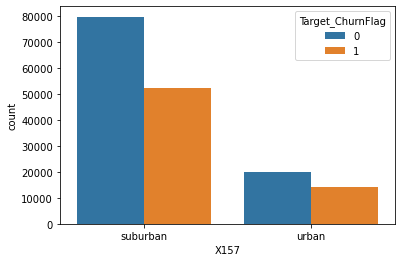

In [61]:

sns.countplot(x='X157', hue = 'Target_ChurnFlag',data = df)

<AxesSubplot:xlabel='X151', ylabel='count'>

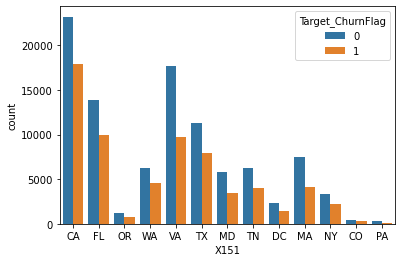

In [62]:
sns.countplot(x='X151', hue = 'Target_ChurnFlag',data = df)

<AxesSubplot:xlabel='X156', ylabel='count'>

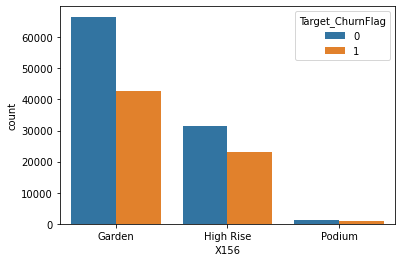

In [63]:
sns.countplot(x='X156', hue = 'Target_ChurnFlag',data = df)

In [64]:
df.X150.value_counts().head(10)

Alexandria          12230
Addison              8654
Salinas              6571
Costa Mesa           5479
Nashville            5216
New York             5203
Newport Beach        5092
Plano                4157
San Francisco        3985
Huntington Beach     3870
Name: X150, dtype: int64

In [65]:
#!pip install sidetable

In [66]:
df['monthly_lease_X0']=df['X0'].str.split(" ").str.get(0)

<AxesSubplot:xlabel='monthly_lease_X0', ylabel='count'>

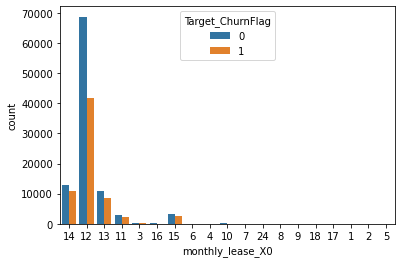

In [67]:
sns.countplot(x='monthly_lease_X0', hue = 'Target_ChurnFlag',data = df)

In [68]:
df['X2'] = pd.to_datetime(df['X2'])

In [69]:
df['year_X2'] = pd.DatetimeIndex(df['X2']).year

<AxesSubplot:xlabel='year_X2', ylabel='count'>

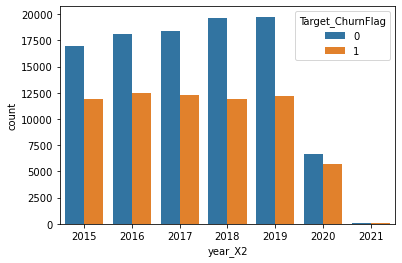

In [70]:
sns.countplot(x='year_X2', hue = 'Target_ChurnFlag',data = df)

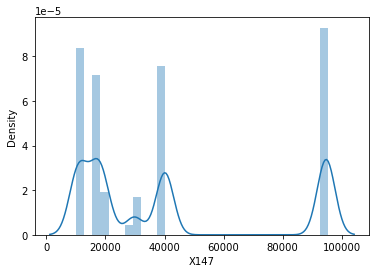

In [71]:
sns.distplot(df.X147) 
plt.show()

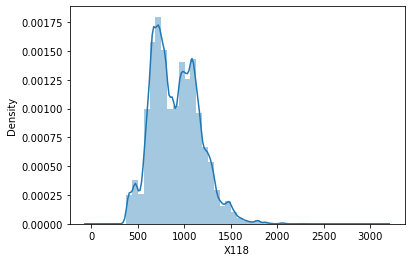

In [72]:
sns.distplot(df.X118) 
plt.show()

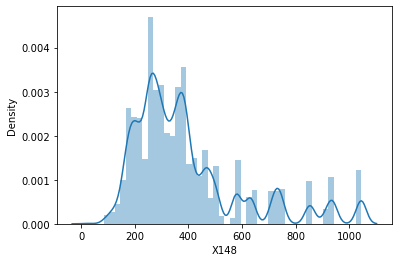

In [73]:
sns.distplot(df.X148) 
plt.show()

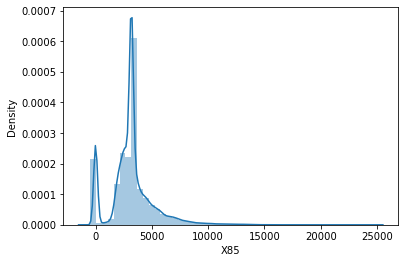

In [74]:
sns.distplot(df.X85) 
plt.show()

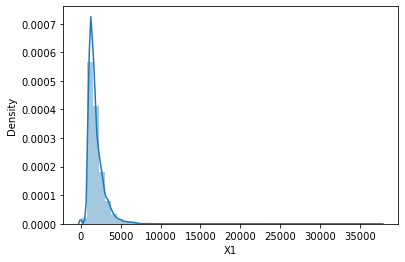

In [75]:
sns.distplot(df.X1, norm_hist=True) 
plt.show()

In [76]:
df1=df.copy()

In [77]:
df1

,UID,X0,X1,X2,X3,X5,X6,X10,X12,X13,X14,X15,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,Target_ChurnFlag,X29,X30,X31,X32,X33,X49,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X102,X103,X104,X105,X106,X107,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X188,X189,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X211,X212,X213,X214,X215,monthly_lease_X0,year_X2
0,1003904-3746,14 month lease,1103.0,2015-01-08,2016-02-28,2015-01-08,2015-01-08,False,1103.0,0,0,1,13,1-3 years,1,16,6,1,0,0,0,0,1,1,1970-01-01 00:00:00.000002016,2015-01-08,2015-07-30,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,2206.00,1,1,1,0,1,0,1,0,0,1,25.0,25.0,25.0,25.0,0,1,42000.0,9,4,8,0,0,1,1,1,2,714.0,714.0,1.0,1.0,15.0,0.0,9.0,11.133333,5.0,14.0,1.0,7.0,0.555556,5.0,0.0,9.0,0.0,40004,240,ACTIVE,Riverside,CA,92507-8463,40004,Other Socal,B,Garden,suburban,university city,0.000000,312.000000,16.000000,71.000000,399.000000,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007000,2015-Q1,2015-01-01,1249.0,1249.0,0.883106,0.883106,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.466667,0.037037,0.333333,0.0,0.600000,0.000000,1.0,1.544818,1.000000,1.662500,0.600000,14,2015
1,1003904-3751,12 month lease,1136.0,2015-01-24,2016-01-17,2003-09-11,2003-09-11,False,1136.0,0,0,1,12,6-12 months,13,15,7,0,0,0,0,0,1,0,1970-01-01 00:00:00.000002016,2015-01-24,2016-01-17,0,0,0,0,1,1,1,1,0,0,1,1.000000,0.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0.0,0.0,2272.00,1,1,1,0,1,0,0,1,0,1,46.0,46.0,46.0,46.0,0,0,0.0,9,4,8,0,0,1,1,1,2,714.0,714.0,1.0,1.0,14.0,0.0,2.0,8.214286,4.0,13.0,0.0,16.0,0.176471,7.0,0.0,17.0,1.0,40004,240,ACTIVE,Riverside,CA,92507-8463,40004,Other Socal,B,Garden,suburban,university city,0.000000,312.000000,16.000000,71.000000,399.000000,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007000,2015-Q1,2015-01-01,1249.0,1249.0,0.909528,0.909528,0.083333,0.083333,0.083333,0.083333,0.000000,0.000000,0.083333,0.083333,0.000000,0.083333,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.142857,0.012605,0.500000,0.0,1.214286,0.071429,1.0,1.591036,1.000000,1.662500,0.142857,12,2015
2,1003904-3756,12 month lease,1382.0,2015-02-20,2016-02-21,2015-02-20,2015-02-20,False,1382.0,0,0,1,12,6-12 months,1,14,7,1,0,0,0,0,1,0,1970-01-01 00:00:00.000002016,2015-02-20,2016-02-21,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,2764.00,3,3,2,1,2,1,1,1,0,2,41.0,44.0,41.0,47.0,1,2,66360.0,18,5,16,2,0,1,1,1,1,1060.0,1060.0,2.0,2.0,13.0,0.0,10.0,11.384615,6.0,17.0,1.0,20.0,0.714286,15.0,0.0,21.0,1.0,40004,240,ACTIVE,Riverside,CA,92507-8463,40004,Other Socal,B,Garden,suburban,university city,0.000000,312.000000,16.000000,71.000000,399.000000,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007000,2015-Q1,2015-01-01,1472.0,1472.0,0.938859,0.938859,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.538462,0.054945,1.153846,0.0,1.615385,0.076923,1.0,1.303774,0.666667,1.662500,0.769231,12,2015
3,1003904-3759,14 month lease,2417.0,2015-02-06,2016-04-03,2015-02-06,2015-02-06,False,1135.0,0,0,1,14,1-3 years,1,13,8,1,0,0,0,0,1,1,1970-01-01 00:00:00.000002016,2015-02-06,2016-04-0

In [78]:
df1.drop(["UID",'X0','X2','X3','X5','X6','X18','X29','X30','X31','X152','X164','X165','X169','X170','year_X2'], axis = 1,inplace=True)

In [79]:
df1['X10'].unique()

array([False])

In [80]:
pd.set_option('display.max_row', None)
df_float.skew(axis = 0, skipna = True)

X1      0.916423
X11          NaN
X12     0.997298
X34     1.019074
X35     0.329305
X36    -1.016473
X37    -1.239383
X38    -1.091419
X39    -0.978384
X40    -1.027456
X41    -1.217617
X42    -1.223757
X43    -0.813785
X44          NaN
X45          NaN
X46          NaN
X47    -1.146077
X48          NaN
X50    -1.234786
X51     1.061624
X52     0.386966
X53    -1.043854
X54    -0.518652
X55     0.635959
X56     1.057511
X65     1.097284
X66     1.203767
X82     0.000000
X83     0.000000
X84     0.963311
X85     0.249863
X86     0.323194
X87     0.059150
X98     0.754374
X101    1.201270
X102    0.883907
X103    0.589913
X104    0.835065
X107    1.190821
X118    0.378145
X119    0.378139
X120    0.118881
X121    0.472194
X122    0.000000
X123    1.001620
X124    0.278281
X125   -0.430373
X126    0.319684
X127    0.000000
X128    1.097363
X129    1.060160
X130    1.092243
X131    0.000000
X132    1.098862
X133    0.808064
X134   -0.269392
X135    1.397226
X136    0.357722
X137   -0.1020

In [83]:
df_int.skew(axis = 0, skipna = True)

X13                   0.000000
X14                   0.000000
X15                   0.000000
X17                   0.987685
X19                   2.577776
X20                  -0.291436
X21                   0.283371
X22                   0.065921
X23                   4.763299
X24                  74.595130
X25                   0.000000
X26                   0.000000
X27                   0.000000
Target_ChurnFlag      0.405427
X32                   0.000000
X33                   0.000000
X49                   1.554220
X57                   0.070791
X58                   1.939332
X59                   1.937760
X60                  -0.028923
X61                   1.937760
X62                   2.966132
X63                  10.446909
X64                   2.671690
X67                   2.009659
X68                 139.966174
X69                   0.000000
X70                 115.414110
X71                 196.620875
X72                   0.000000
X73                   2.408200
X74     

In [ ]:
X96,X97,X105,X113,X114,X117,X106,X70,X71,X78,X80,X81,X88,X24,X63,X62,X63,X64,X67,X68,X23,X19

In [81]:
#removing constant columns as it won't affect y in any sense.
df1.drop(["X149",'X10'],axis=1,inplace=True)

In [82]:
df1.to_csv('churn.csv')